# **[Yulu - Hypothesis Testing Business Case Study]()**

Yulu is India's leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

## **Objective/ Purpose of analyzing Yulu data**

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**`The company wants to know:`**

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

- How well those variables describe the electric cycle demands?

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,zscore,boxcox,probplot
from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, mannwhitneyu
from scipy.stats import chisquare, chi2, chi2_contingency
from scipy.stats import f_oneway, kruskal, shapiro, levene, kstest
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

**Explanation about importing these libraries -**

1. **`statsmodels.stats.weightstats` :**

    Used for performing Hypothesis testing and calculating Confidence Interval for means, proportions, and variances.

2. **`statsmodels.stats.proportion` :**

    Used for conductiong Hypothesis tests and confidence intervals for proportions.

3. **`scipy.stats`**:

    This module have a wide range of statistical functions for Hypothesis testing, calculating probability distributions, and performing various statistical tests.

4. **`sklearn.preprocessing.StandardScaler` :**

    This is a class in Scikit-learn library which is used for standardizing features by removing the mean and scaling to unit variance.

5. **`sklearn.preprocessing.MinMaxScaler`:**

    Used for scaling features to a specified range typically between 0 and 1.

6. **`statsmodels.api` :**

    This module in statsmodels provides tools for statistical modeling including linear regression, generalized linear models, and time series analysis.

7. **`statsmodels.formula.api.ols` :**

    This function in statsmodels is used for fitting Ordinary Least Squares (OLS) regression models using formula-based syntax.

8. **`scipy.stats.chisquare,chi2_contingency` :**

    These functions in scipy are used for performing the chi-square test of independence between categorical variables.

9. **`scipy.stats.ttest_ind, ttest_rel, ttest_1samp, mannwhitneyu` :**

    These functions in scipy are used for conducting t-tests for independent samples, related samples, one-sample t-tests, and Mann-Whitney U tests respectively.

10. **`scipy.stats.f_oneway, kruskal` :**

    These functions in scipy are used for conducting ANOVA and Kruskal-Wallis tests respectively for comparing means of multiple groups.

11. **`scipy.stats.shapiro, levene, kstest` :**

    These functions in scipy are used for testing the normality of data, testing the equality of variances, and conducting Kolmogorov-Smirnov tests for goodness of fit.

12. **`scipy.stats.pearsonr, spearmanr`:**

    These functions in scipy are used for calculating the Pearson correlation coefficient and Spearman rank correlation coefficient respectively.

In [2]:
#Reading the CSV file data for Yulu Dataset
bike_data = pd.read_csv('bike_sharing.csv')

## **Data analysis like checking the structure & characteristics of the dataset**

In [3]:
dt = ['season', 'holiday', 'workingday', 'weather']
for i in dt:
    bike_data[i] = bike_data[i].astype('category')

In [4]:
bike_data['datetime'] = pd.to_datetime(bike_data['datetime'])

> Here, I have converted int and Datetime Datatype from "int" to "category" and "object" to "datetime" format respectively.

In [5]:
bike_data.rename(columns={'count':'total_riders'},inplace=True)

In [6]:
bike_data['year'] = bike_data['datetime'].dt.year
bike_data['month'] = bike_data['datetime'].dt.month
bike_data['hour'] = bike_data['datetime'].dt.hour
bike_data['month'] = bike_data['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August',
                                                 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [7]:
bike_data['season'] = bike_data['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike_data['weather'] = bike_data['weather'].replace({1: 'Clear',
                                                     2: 'Misty_cloudy',
                                                     3: 'Rain' ,
                                                     4: 'Heavy_rain'})

bike_data['holiday'] = bike_data['holiday'].replace({1: 'Holiday', 0: 'Non-Holiday'})
bike_data['workingday'] = bike_data['workingday'].replace({1: 'Working day', 0: 'Non-Working day'})

bike_data.groupby('weather').count().reset_index()

,weather,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,total_riders,year,month,hour
0,Clear,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192
1,Misty_cloudy,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834
2,Rain,859,859,859,859,859,859,859,859,859,859,859,859,859,859
3,Heavy_rain,1,1,1,1,1,1,1,1,1,1,1,1,1,1


> Clear, Few clouds, partly cloudy type of weather is typically referred to as "Clear."

> The weather condition described as Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds is generally referred to as "Misty_Cloudy".

> The weather condition described as Light Snow,  Light Rain + Thunderstorm + Scattered clouds,  Light Rain + Scattered clouds is generally referred to as "Rain".


> Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog type of weather is called a "Heavy_rain."

#### **Displaying data types of each column**

In [8]:
bike_data.dtypes

datetime        datetime64[ns]
season                category
holiday               category
workingday            category
weather               category
temp                   float64
atemp                  float64
humidity                 int64
windspeed              float64
casual                   int64
registered               int64
total_riders             int64
year                     int64
month                   object
hour                     int64
dtype: object

In [9]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  category      
 2   holiday       10886 non-null  category      
 3   workingday    10886 non-null  category      
 4   weather       10886 non-null  category      
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  total_riders  10886 non-null  int64         
 12  year          10886 non-null  int64         
 13  month         10886 non-null  object        
 14  hour          10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), f

#### **Viewing and understanding top 5 rows of the Netfix dataframe**

In [10]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_riders,year,month,hour
0,2011-01-01 00:00:00,spring,Non-Holiday,Non-Working day,Clear,9.84,14.395,81,0.0,3,13,16,2011,January,0
1,2011-01-01 01:00:00,spring,Non-Holiday,Non-Working day,Clear,9.02,13.635,80,0.0,8,32,40,2011,January,1
2,2011-01-01 02:00:00,spring,Non-Holiday,Non-Working day,Clear,9.02,13.635,80,0.0,5,27,32,2011,January,2
3,2011-01-01 03:00:00,spring,Non-Holiday,Non-Working day,Clear,9.84,14.395,75,0.0,3,10,13,2011,January,3
4,2011-01-01 04:00:00,spring,Non-Holiday,Non-Working day,Clear,9.84,14.395,75,0.0,0,1,1,2011,January,4


#### **Finding the number of rows and columns given in the dataset**

In [11]:
print(f'Number of Rows : {bike_data.shape[0]}\n\nNumber of Columns : {bike_data.shape[1]}')

Number of Rows : 10886

Number of Columns : 15


#### **Checking Duplicate values in the dataset**

In [12]:
bike_data.duplicated().value_counts()

False    10886
dtype: int64

#### **Check for the missing values and find the number of missing values in each column**

In [13]:
print(f'{bike_data.isna().value_counts()}\n\n')

print(bike_data.isna().sum())

datetime  season  holiday  workingday  weather  temp   atemp  humidity  windspeed  casual  registered  total_riders  year   month  hour 
False     False   False    False       False    False  False  False     False      False   False       False         False  False  False    10886
dtype: int64


datetime        0
season          0
holiday         0
workingday      0
weather         0
temp            0
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
total_riders    0
year            0
month           0
hour            0
dtype: int64


#### **Checking the unique values for columns**

In [14]:
for i in bike_data.columns:
  print(f'Unique Values in {i} column are :-\n {bike_data[i].unique()}\n\n')

Unique Values in datetime column are :-
 ['2011-01-01T00:00:00.000000000' '2011-01-01T01:00:00.000000000'
 '2011-01-01T02:00:00.000000000' ... '2012-12-19T21:00:00.000000000'
 '2012-12-19T22:00:00.000000000' '2012-12-19T23:00:00.000000000']


Unique Values in season column are :-
 ['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['spring', 'summer', 'fall', 'winter']


Unique Values in holiday column are :-
 ['Non-Holiday', 'Holiday']
Categories (2, object): ['Non-Holiday', 'Holiday']


Unique Values in workingday column are :-
 ['Non-Working day', 'Working day']
Categories (2, object): ['Non-Working day', 'Working day']


Unique Values in weather column are :-
 ['Clear', 'Misty_cloudy', 'Rain', 'Heavy_rain']
Categories (4, object): ['Clear', 'Misty_cloudy', 'Rain', 'Heavy_rain']


Unique Values in temp column are :-
 [ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.6

#### **Checking the number of unique values for columns**

In [15]:
for i in bike_data.columns:
  print(f'Number of Unique values in {i} column : {bike_data[i].nunique()}')

Number of Unique values in datetime column : 10886
Number of Unique values in season column : 4
Number of Unique values in holiday column : 2
Number of Unique values in workingday column : 2
Number of Unique values in weather column : 4
Number of Unique values in temp column : 49
Number of Unique values in atemp column : 60
Number of Unique values in humidity column : 89
Number of Unique values in windspeed column : 28
Number of Unique values in casual column : 309
Number of Unique values in registered column : 731
Number of Unique values in total_riders column : 822
Number of Unique values in year column : 2
Number of Unique values in month column : 12
Number of Unique values in hour column : 24


#### **Insights**

- There are 10886 rows and 12 columns in the data
- There are no null values
- There are also no duplicate values

- The columns "temp", "atemp", and "windspeed" have **float** datatype

> Now, no column has **Object** datatype

> season, holiday, workingday, weather, humidity, casual, registered, count have **Integer** datatype

> temp, atemp, windspeed have **Float** datatype

> The column "datetime" has object datatype. However, I have changed it to "datetime" format

> The columns "season", "holiday", "workingday", "weather", "humidity" "casual", "registered" and "total_riders" have int datatype. However, I have changed season, holiday, workingday, weather should in object format as they are categorical in nature

\


#### **Statistical summary of All columns**

In [16]:
bike_data.describe(include='all').fillna('-').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-01-01 00:00:00,1,2011-01-01 00:00:00,2012-12-19 23:00:00,-,-,-,-,-,-,-
season,10886,4,winter,2734,-,-,-,-,-,-,-,-,-
holiday,10886,2,Non-Holiday,10575,-,-,-,-,-,-,-,-,-
workingday,10886,2,Working day,7412,-,-,-,-,-,-,-,-,-
weather,10886,4,Clear,7192,-,-,-,-,-,-,-,-,-
temp,10886.0,-,-,-,-,-,20.23086,7.79159,0.82,13.94,20.5,26.24,41.0
atemp,10886.0,-,-,-,-,-,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455
humidity,10886.0,-,-,-,-,-,61.88646,19.245033,0.0,47.0,62.0,77.0,100.0
windspeed,10886.0,-,-,-,-,-,12.799395,8.164537,0.0,7.0015,12.998,16.9979,56.9969
casual,10886.0,-,-,-,-,-,36.021955,49.960477,0.0,4.0,17.0,49.0,367.0


In [17]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_riders,year,month,hour
0,2011-01-01 00:00:00,spring,Non-Holiday,Non-Working day,Clear,9.84,14.395,81,0.0,3,13,16,2011,January,0
1,2011-01-01 01:00:00,spring,Non-Holiday,Non-Working day,Clear,9.02,13.635,80,0.0,8,32,40,2011,January,1
2,2011-01-01 02:00:00,spring,Non-Holiday,Non-Working day,Clear,9.02,13.635,80,0.0,5,27,32,2011,January,2
3,2011-01-01 03:00:00,spring,Non-Holiday,Non-Working day,Clear,9.84,14.395,75,0.0,3,10,13,2011,January,3
4,2011-01-01 04:00:00,spring,Non-Holiday,Non-Working day,Clear,9.84,14.395,75,0.0,0,1,1,2011,January,4


## **Detect Outliers**

Finding the outliers for every continuous variable in the dataset

In [18]:
categorical_var = ['datetime', 'season', 'holiday', 'workingday', 'weather']

In [19]:
continuous_var = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_riders']

In [20]:
arr = {'5th percentile': 5, '25th percentile or Q1': 25, '50th percentile or Q2': 50, '75th percentile or Q3': 75,
       '95th percentile': 95}

In [21]:
for key, value in arr.items():
  for i in continuous_var:
    print(f'{i} : {key} -> {np.percentile(bike_data[i], value):.2f}')
  print('_'*100, sep = " ")

temp : 5th percentile -> 8.20
atemp : 5th percentile -> 9.85
humidity : 5th percentile -> 31.00
windspeed : 5th percentile -> 0.00
casual : 5th percentile -> 0.00
registered : 5th percentile -> 4.00
total_riders : 5th percentile -> 5.00
____________________________________________________________________________________________________
temp : 25th percentile or Q1 -> 13.94
atemp : 25th percentile or Q1 -> 16.66
humidity : 25th percentile or Q1 -> 47.00
windspeed : 25th percentile or Q1 -> 7.00
casual : 25th percentile or Q1 -> 4.00
registered : 25th percentile or Q1 -> 36.00
total_riders : 25th percentile or Q1 -> 42.00
____________________________________________________________________________________________________
temp : 50th percentile or Q2 -> 20.50
atemp : 50th percentile or Q2 -> 24.24
humidity : 50th percentile or Q2 -> 62.00
windspeed : 50th percentile or Q2 -> 13.00
casual : 50th percentile or Q2 -> 17.00
registered : 50th percentile or Q2 -> 118.00
total_riders : 50th perc

In [22]:
for i in continuous_var:
  Q1 = np.percentile(bike_data[i], arr['25th percentile or Q1'])
  Q3 = np.percentile(bike_data[i], arr['75th percentile or Q3'])
  percentile_95 = np.percentile(bike_data[i], arr['95th percentile'])
  IQR = Q3 - Q1

  # Define the outlier thresholds
  lower_threshold = Q1 - 1.5 * IQR
  upper_threshold = Q3 + 1.5 * IQR

  # Find the outliers for the iiable
  outliers = bike_data[(bike_data[i] < lower_threshold) | (bike_data[i] > upper_threshold)]

  # Calculate the percentage of outliers
  outlier_percentage = round(len(outliers) / len(bike_data[i]) * 100, 2 )

  # Output the percentage of outliers
  print(f"IQR for {i}: {IQR:.2f}")
  print(f"Outlier above this Q3 {i} : {upper_threshold:.2f}")
  print(f"Percentage of outliers for {i}: {outlier_percentage:.2f}% \n")
  print('_'*100, sep = " ")

IQR for temp: 12.30
Outlier above this Q3 temp : 44.69
Percentage of outliers for temp: 0.00% 

____________________________________________________________________________________________________
IQR for atemp: 14.39
Outlier above this Q3 atemp : 52.65
Percentage of outliers for atemp: 0.00% 

____________________________________________________________________________________________________
IQR for humidity: 30.00
Outlier above this Q3 humidity : 122.00
Percentage of outliers for humidity: 0.20% 

____________________________________________________________________________________________________
IQR for windspeed: 10.00
Outlier above this Q3 windspeed : 31.99
Percentage of outliers for windspeed: 2.09% 

____________________________________________________________________________________________________
IQR for casual: 45.00
Outlier above this Q3 casual : 116.50
Percentage of outliers for casual: 6.88% 

______________________________________________________________________________

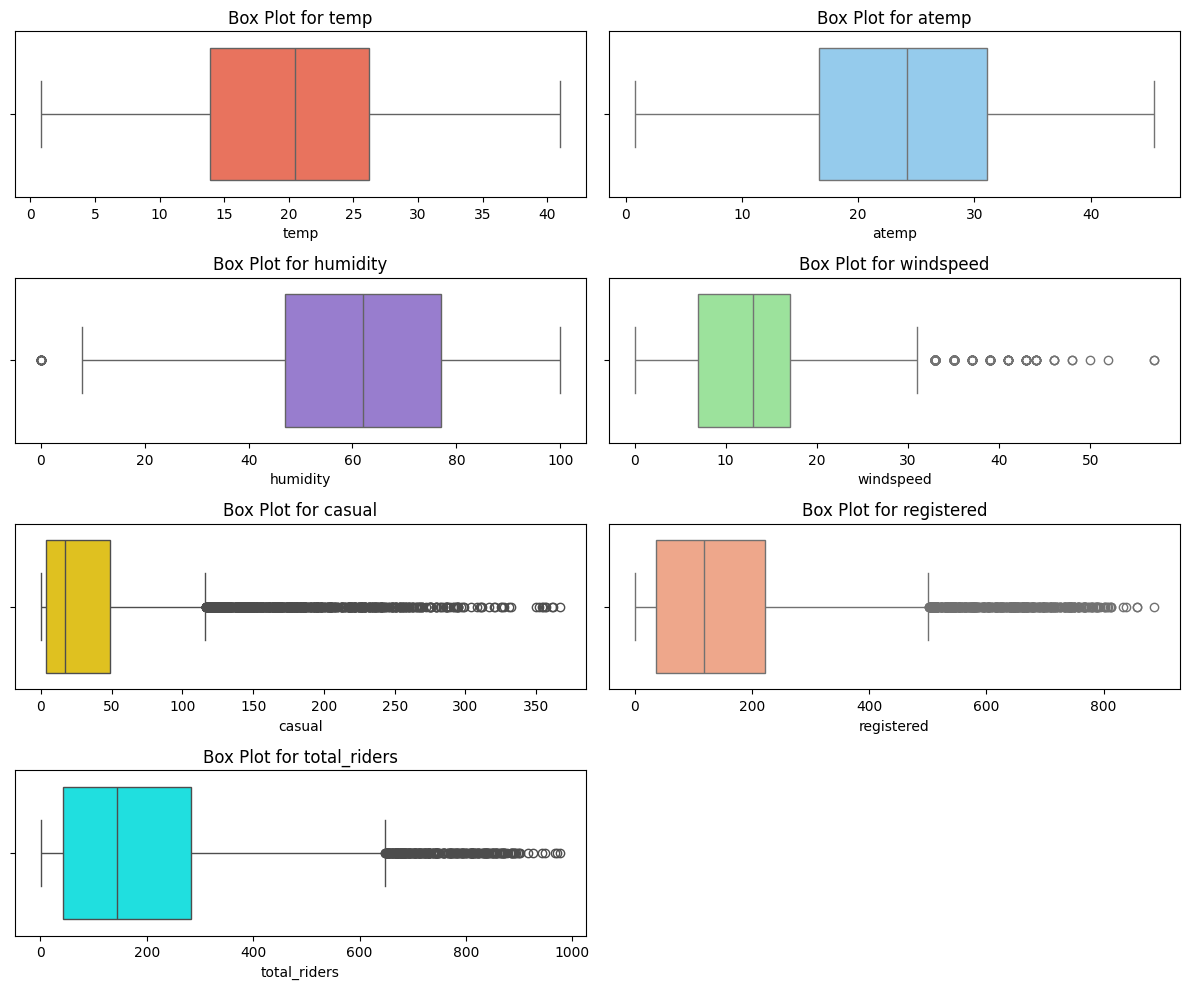

In [23]:
plt.figure(figsize=(12, 10))

# Create box plots for each continuous variable
variables = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'total_riders']
colors = ["#FF6347", "#87CEFA", "#9370DB", "#90EE90", "#FFD700", "#FFA07A", "#00FFFF"]

# Loop through the variables and create the box plots
for i, var in enumerate(variables):
    plt.subplot(4, 2, i+1)  # Adjust the subplot layout to fit all variables
    sns.boxplot(x=bike_data[var], palette= [colors[i]])
    plt.title(f'Box Plot for {var}')


plt.tight_layout()
plt.show()

**Remove/clip the data between the 5 percentile and 95 percentile**

In [24]:
clipped_temp = np.clip(bike_data['temp'], np.percentile(bike_data['temp'], 5), np.percentile(bike_data['temp'], 95))
clipped_atemp = np.clip(bike_data['atemp'], np.percentile(bike_data['atemp'], 5), np.percentile(bike_data['atemp'], 95))
clipped_humidity = np.clip(bike_data['humidity'], np.percentile(bike_data['humidity'], 5), np.percentile(bike_data['humidity'], 95))
clipped_windspeed = np.clip(bike_data['windspeed'], np.percentile(bike_data['windspeed'], 5), np.percentile(bike_data['windspeed'], 95))
clipped_casual = np.clip(bike_data['casual'], np.percentile(bike_data['casual'], 5), np.percentile(bike_data['casual'], 95))
clipped_registered = np.clip(bike_data['registered'], np.percentile(bike_data['registered'], 5), np.percentile(bike_data['registered'], 95))
clipped_total_riders = np.clip(bike_data['total_riders'], np.percentile(bike_data['total_riders'], 5), np.percentile(bike_data['total_riders'], 95))

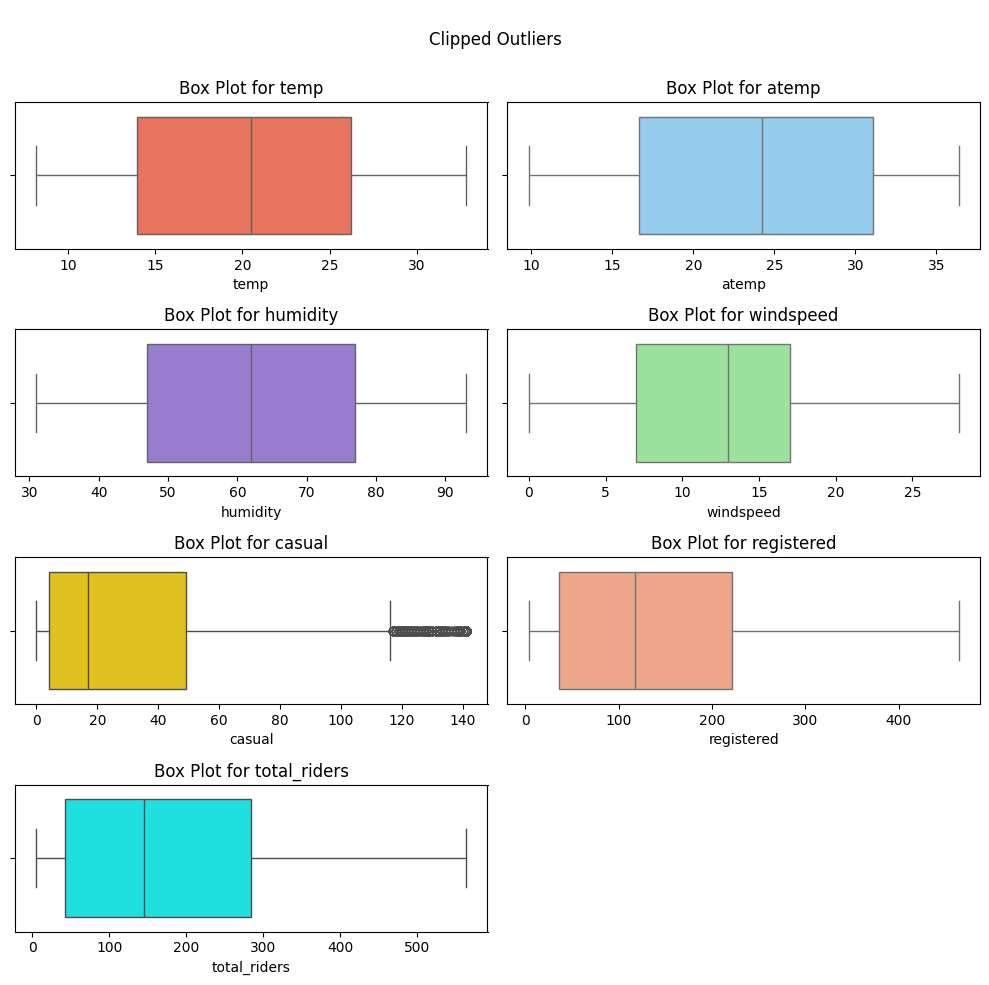

In [25]:
fig, ax = plt.subplots(4, 2, figsize=(10, 10))
fig.suptitle("\nClipped Outliers\n")
colors = ["#FF6347", "#87CEFA", "#9370DB", "#90EE90", "#FFD700", "#FFA07A",  "#00FFFF"]

variables = [clipped_temp, clipped_atemp, clipped_humidity, clipped_windspeed, clipped_casual, clipped_registered, clipped_total_riders]

for i, variable in enumerate(variables):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=variable, palette=[colors[i]])
    plt.title(f'Box Plot for {variables[i].name}')

# Remove the 8th subplot
fig.delaxes(ax[-1, -1])

plt.tight_layout()
plt.show()

#### **Insights:**

> According to the graphical representation windspeed,casual,registered,count attributes have major outliers and humidity has minor outliers and temp and atemp has no outliers.

#### **Recommendations**

1. Outlier detection and treatment: It is important to identify and address outliers in the windspeed, casual, registered, and count attributes to ensure the accuracy and reliability of the data analysis. Consider using statistical methods such as Z-score or IQR to identify and remove or adjust the outliers in these variables.

2. Data validation: Review the data collection process for windspeed, casual, registered, and count attributes to ensure that any extreme values are not due to errors or inconsistencies in data recording. Validate the data sources and collection methods to prevent outliers from affecting the analysis.

3. Sensitivity analysis: Conduct sensitivity analysis to understand the impact of outliers on the relationships between variables and the overall analysis results. Evaluate whether the outliers significantly influence the conclusions drawn from the data and consider appropriate measures to mitigate their effects.

4. Robust modeling techniques: Consider using robust modeling techniques that are less sensitive to outliers, such as robust regression or decision tree algorithms, to build predictive models or analyze data in the presence of outliers.

5. Continuous monitoring: Establish a process for monitoring outliers in the windspeed, casual, registered, and count attributes on an ongoing basis to identify any new outliers that may arise over time. Regularly review and update the outlier detection and treatment methods to maintain data quality.

### Non-Graphical Analysis: Value counts and unique attributes

In [26]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  category      
 2   holiday       10886 non-null  category      
 3   workingday    10886 non-null  category      
 4   weather       10886 non-null  category      
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  total_riders  10886 non-null  int64         
 12  year          10886 non-null  int64         
 13  month         10886 non-null  object        
 14  hour          10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), f

In [27]:
bike_data.describe(include = 'object')

,month
count,10886
unique,12
top,May
freq,912


### value_counts and unique attributes

In [28]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

In [29]:
for column in categorical_columns:
    print(f"{bike_data[column].value_counts()}\n")

winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64

Non-Holiday    10575
Holiday          311
Name: holiday, dtype: int64

Working day        7412
Non-Working day    3474
Name: workingday, dtype: int64

Clear           7192
Misty_cloudy    2834
Rain             859
Heavy_rain         1
Name: weather, dtype: int64



In [30]:
for j in bike_data.columns[5:]:
    if bike_data[j].dtype != 'category':
        print(f'Value_counts of the column {j} are :-{bike_data[j].value_counts().to_frame().reset_index()}')
        print()
        print('-'*140)
        print()

Value_counts of the column temp are :-    index  temp
0   14.76   467
1   26.24   453
2   28.70   427
3   13.94   413
4   18.86   406
5   22.14   403
6   25.42   403
7   16.40   400
8   22.96   395
9   27.06   394
10  24.60   390
11  12.30   385
12  21.32   362
13  17.22   356
14  13.12   356
15  29.52   353
16  10.66   332
17  18.04   328
18  20.50   327
19  30.34   299
20   9.84   294
21  15.58   255
22   9.02   248
23  31.16   242
24   8.20   229
25  27.88   224
26  23.78   203
27  32.80   202
28  11.48   181
29  19.68   170
30   6.56   146
31  33.62   130
32   5.74   107
33   7.38   106
34  31.98    98
35  34.44    80
36  35.26    76
37   4.92    60
38  36.90    46
39   4.10    44
40  37.72    34
41  36.08    23
42   3.28    11
43   0.82     7
44  38.54     7
45  39.36     6
46   2.46     5
47   1.64     2
48  41.00     1

--------------------------------------------------------------------------------------------------------------------------------------------

Value_counts of the

In [31]:
for _ in bike_data.columns:
    if bike_data[_].dtype=='category':
        print()
        display(np.round(bike_data[_].value_counts(normalize = True) * 100, 2).reset_index())
        print('-'*137)
        print()

,index,season
0,winter,25.11
1,summer,25.11
2,fall,25.11
3,spring,24.67


-----------------------------------------------------------------------------------------------------------------------------------------




,index,holiday
0,Non-Holiday,97.14
1,Holiday,2.86


-----------------------------------------------------------------------------------------------------------------------------------------




,index,workingday
0,Working day,68.09
1,Non-Working day,31.91


-----------------------------------------------------------------------------------------------------------------------------------------




,index,weather
0,Clear,66.07
1,Misty_cloudy,26.03
2,Rain,7.89
3,Heavy_rain,0.01


-----------------------------------------------------------------------------------------------------------------------------------------



## **Analyze the distribution of Numerical & Categorical variables**

### For each categorical features

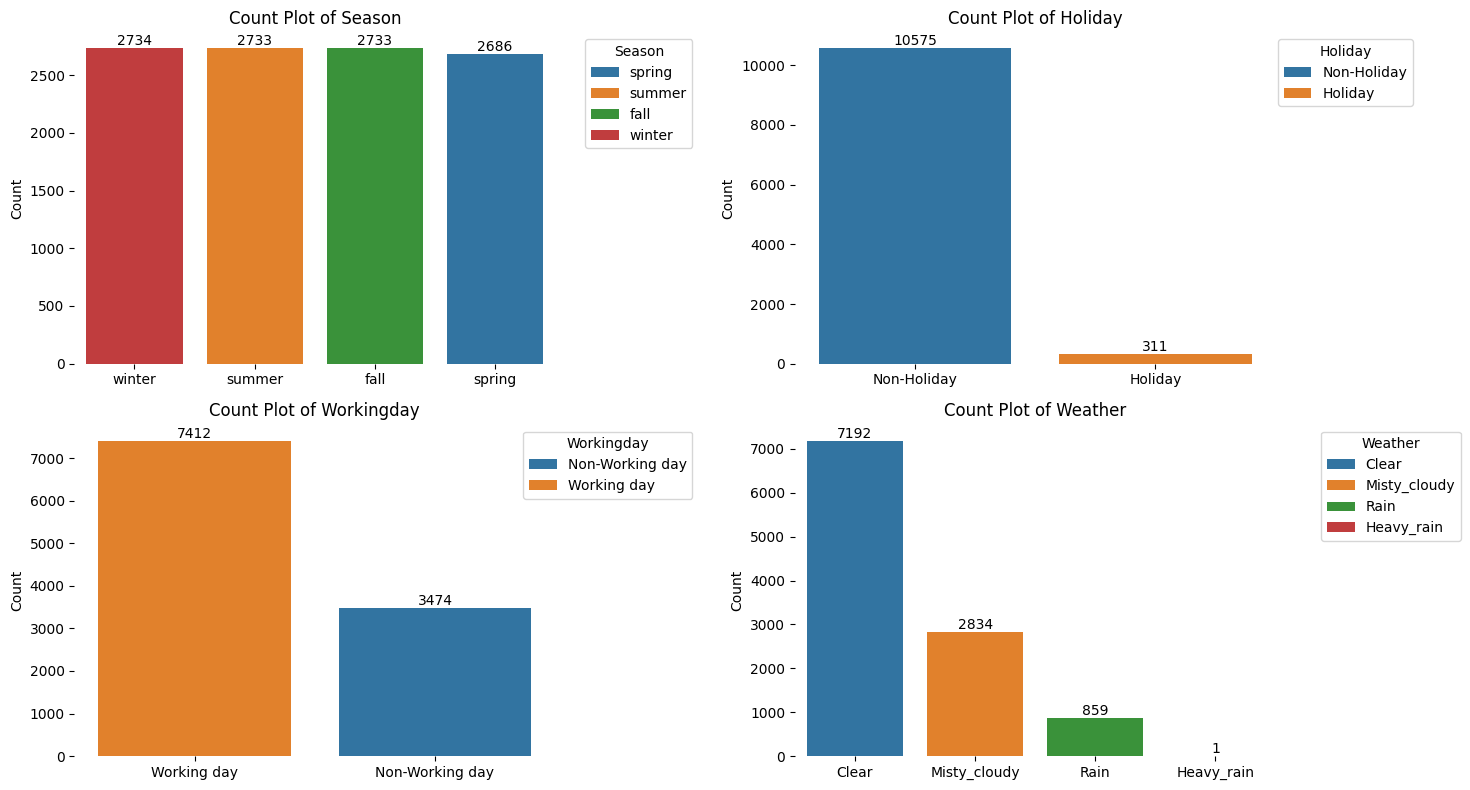

In [32]:
# Countplots for each categorical variable
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

for i, column in enumerate(categorical_columns):
    row = i // 2
    col = i % 2
    order = bike_data[column].value_counts().index
    sns.countplot(x=column, data=bike_data, order=order, ax=axes[row, col], hue=column, legend=True)
    axes[row, col].set_title(f'Count Plot of {column.capitalize()}')
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Count')
    axes[row, col].tick_params(axis='y', labelsize=10)
    axes[row, col].tick_params(axis='x', labelsize=10)
    axes[row, col].legend(title=column.capitalize(), loc='upper right', bbox_to_anchor=(1.3, 1))
    sns.despine(left=True,bottom=True)
    axes[row, col].patch.set_alpha(0)
    for container in axes[row, col].containers:
        axes[row, col].bar_label(container, label_type='edge')
plt.legend(title=column.capitalize(), loc='upper right', bbox_to_anchor=(1.4, 1))
plt.tight_layout()
plt.show()

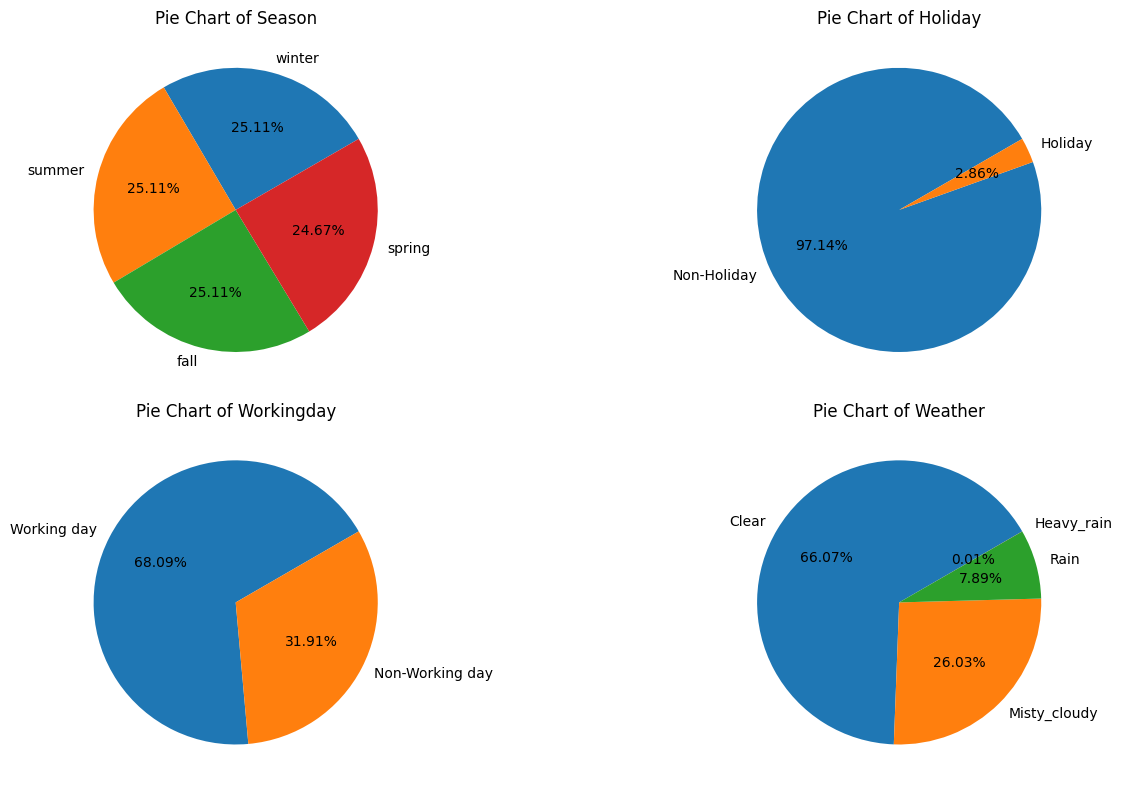

In [33]:
# Pie Charts for each categorical variable
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

for i, column in enumerate(categorical_columns):
    row = i // 2
    col = i % 2
    order = bike_data[column].value_counts()
    axes[row, col].pie(order, labels=order.index, autopct='%1.2f%%', startangle=30)
    axes[row, col].set_title(f'Pie Chart of {column.capitalize()}')

plt.tight_layout()
plt.show()

#### **Insights:**

1. Season:

    • The count plot for seasons shows that each season category (spring, summer, fall, and winter) has a roughly similar number of occurrences.

    • This suggests that the dataset is well-distributed across the four seasons, and there is no significant imbalance.

2. Holiday:

    • The count plot for holidays indicates that the dataset predominantly contains nonholiday data.

    • There are significantly fewer instances of holiday data compared to nonholiday
    days.

3. Working Day:

    • The count plot for working days shows that there are more instances of working days compared to non-working days.

    • This suggests that the dataset contains a higher proportion of data from regular working days.

4. Weather:

    • The count plot for weather conditions reveals that the majority of the dataset corresponds to clear or slightly cloudy weather.

    • Other weather conditions (mist, rain, thunderstorm, and snow) have significantly fewer occurrences.

#### **Recommendations**

1. Seasonal promotions: Take advantage of the well-distributed nature of the dataset across all seasons to create seasonal promotions or special offers tailored to each season. This can help attract riders during specific times of the year.

2. Holiday campaigns: Since there are significantly fewer instances of holiday data, consider running targeted campaigns or promotions during holidays to encourage more rentals on these occasions.

3. Working day specials: With a higher proportion of data from regular working days, consider offering incentives or discounts for riders who use the bikes for commuting purposes. This can attract more users during peak working hours.

4. Weather-based strategies: Given that clear or slightly cloudy weather conditions dominate the dataset, consider implementing weather-specific strategies such as offering rain gear rentals on rainy days or promoting cycling on clear days to make the most of the favorable weather conditions.

In [34]:
bike_data.describe()

,temp,atemp,humidity,windspeed,casual,registered,total_riders,year,hour
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,11.541613
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,6.915838
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,6.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,12.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,18.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,23.000000


In [35]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_riders,year,month,hour
0,2011-01-01 00:00:00,spring,Non-Holiday,Non-Working day,Clear,9.84,14.395,81,0.0,3,13,16,2011,January,0
1,2011-01-01 01:00:00,spring,Non-Holiday,Non-Working day,Clear,9.02,13.635,80,0.0,8,32,40,2011,January,1
2,2011-01-01 02:00:00,spring,Non-Holiday,Non-Working day,Clear,9.02,13.635,80,0.0,5,27,32,2011,January,2
3,2011-01-01 03:00:00,spring,Non-Holiday,Non-Working day,Clear,9.84,14.395,75,0.0,3,10,13,2011,January,3
4,2011-01-01 04:00:00,spring,Non-Holiday,Non-Working day,Clear,9.84,14.395,75,0.0,0,1,1,2011,January,4


## **Univariate Analysis:**

### For each Numerical features

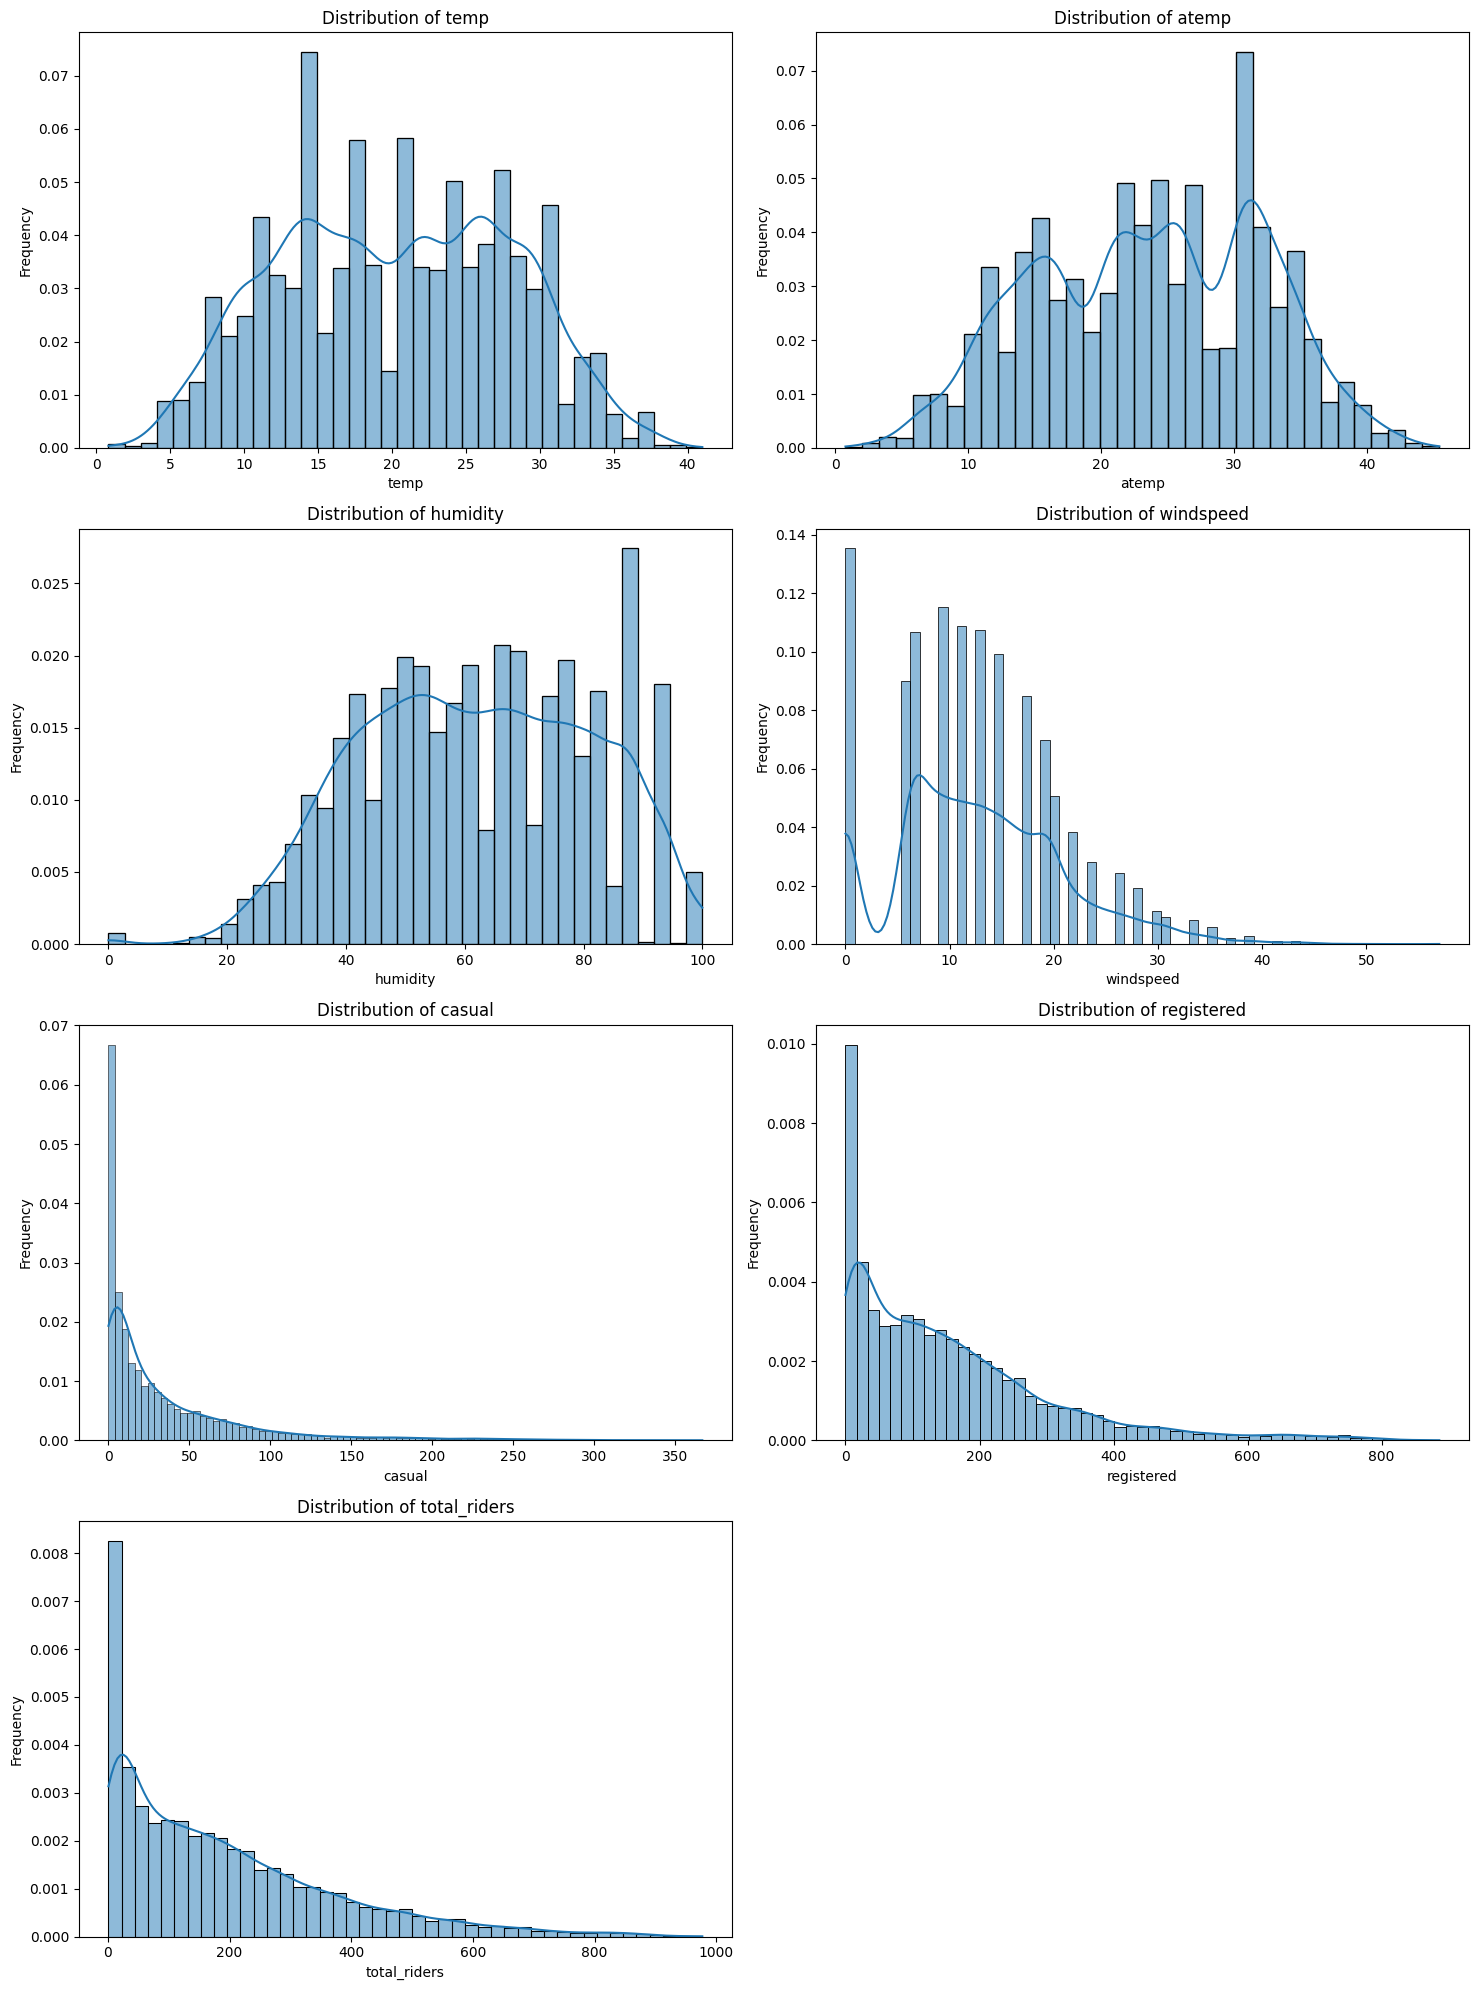

In [36]:
#Histplot for Numerical columns :

# The below code generates a histogram plot for the 'temp' feature, showing the distribution of temperature values in the dataset.
# The addition of the kernel density estimation plot provides
    # a visual representation of the underlying distribution shape, making it easier to analyze the
    # data distribution.

fig, ax = plt.subplots(4, 2, figsize=(15, 20))

# Plot histograms for continuous variables
for i, feature in enumerate(continuous_var):
    row, col = divmod(i, 2)
    sns.histplot(bike_data[feature], kde=True, ax=ax[row, col], line_kws={'color': 'red'}, stat='density',)
    ax[row, col].set_title('Distribution of ' + feature)
    ax[row, col].set_xlabel(feature)
    ax[row, col].set_ylabel('Frequency')

plt.tight_layout()
fig.delaxes(ax[-1, -1])

plt.show()

#### **Insights:**

1. Temperature (temp and atemp): The distributions are bell-shaped and symmetric, similar to a normal distribution. Most values cluster around the mean temperature, indicating a balanced spread of temperatures.

2. Humidity (humidity):The distribution is right-skewed, with a tail on the higher humidity values. This suggests that higher humidity levels are more common, and there are fewer instances of low humidity.

3. Wind Speed (windspeed): The distribution is also right-skewed, with a peak at lower wind speeds. However, there are occasional days with much higher wind speeds, creating a right-skewed tail.

4. User Counts (casual, registered, and count): All these distributions are right-skewed, indicating that most days have relatively lower bike rental counts. However, there are some days with significantly higher rental counts, causing the right-skewed shape.


#### **Recommendations**

1. Temperature analysis: Given the bell-shaped and symmetric distributions of temperature variables (temp and atemp), consider leveraging this balanced spread of temperatures to offer temperature-specific promotions or incentives. For example, promote bike rentals during comfortable temperature ranges to attract more users.

2. Humidity management: With the right-skewed distribution of humidity values, focus on providing solutions to mitigate the impact of high humidity days, such as offering indoor cycling classes or promoting early morning or late evening rides when humidity levels are lower.

3. Wind speed considerations: Since the distribution of wind speed is right-skewed with occasional high wind speed days, consider implementing safety measures or guidelines for riders on days with significantly higher wind speeds. Provide information on wind-resistant routes or sheltered areas for biking during windy conditions.

4. User count strategies: Develop targeted marketing campaigns or promotions to attract more users on days with lower bike rental counts. Consider offering discounts or incentives during off-peak days to increase ridership during these periods.

5. Seasonal adjustments: Take into account the impact of temperature, humidity, and wind speed variations on user counts across different seasons. Tailor your marketing strategies and services based on the weather conditions typical of each season to optimize bike rental demand.

##**Relationship between the Dependent and Independent Variables**

,temp,atemp,humidity,windspeed,casual,registered,total_riders,year,hour
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.145430
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.140343
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,-0.278011
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,0.146631
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.302045
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.380540
total_riders,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.260403,0.400601
year,0.061226,0.058540,-0.078606,-0.015221,0.145241,0.264265,0.260403,1.000000,-0.004234
hour,0.145430,0.140343,-0.278011,0.146631,0.302045,0.380540,0.400601,-0.004234,1.000000


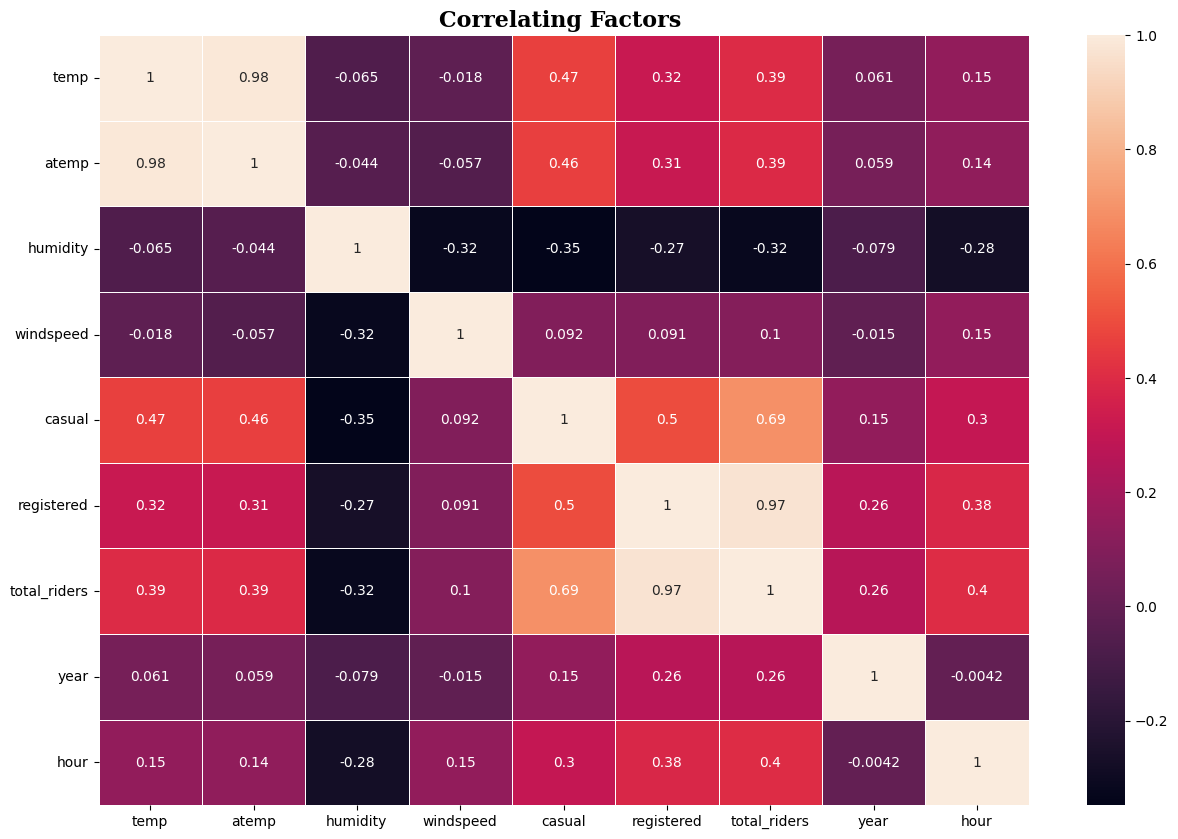

In [37]:
corr_df =  bike_data.corr(numeric_only=True)
display(corr_df)
plt.figure(figsize=(15,10))
sns.heatmap(bike_data.corr(numeric_only=True), annot=True, linewidth=.5)
plt.yticks(rotation=0)
plt.title('Correlating Factors ',fontfamily='serif',fontweight='bold',fontsize=16)
plt.show()

####**Insights:**

• Temperature (temp) and Feeling Temperature (atemp): Both temperature and feeling temperature have a positive correlation with the count of bike rentals. Warmer temperatures are associated with more bike rentals.

• Humidity (humidity): Humidity shows a negative correlation with bike rentals. Lower humidity levels are linked to higher bike rental counts, meaning drier conditions attract more riders.

• Wind Speed (windspeed): Wind speed has a weak negative correlation with the count of bike rentals. Higher wind speeds are marginally associated with fewer bike rentals.

• Casual Users (casual) and Registered Users (registered): Both casual and registered user counts have strong positive correlations with the total bike rental count. More users, both casual and registered, lead to a higher total rental count.


#### **Recommendations**

1. Offer promotions or discounts on days with higher humidity levels to encourage more rentals during these times.

2. Provide wind-resistant bikes or promote routes that are shielded from strong wind conditions to attract riders on windy days.

3. Increase marketing efforts to attract more casual and registered users, as they have a significant impact on total rental counts.

4. Monitor temperature and feeling temperature forecasts to adjust bike availability and staff scheduling accordingly to meet the demand during warmer days.

5. Consider implementing loyalty programs or incentives for frequent riders to encourage repeat business and increase the number of registered users.

## **Bivariate Analysis**

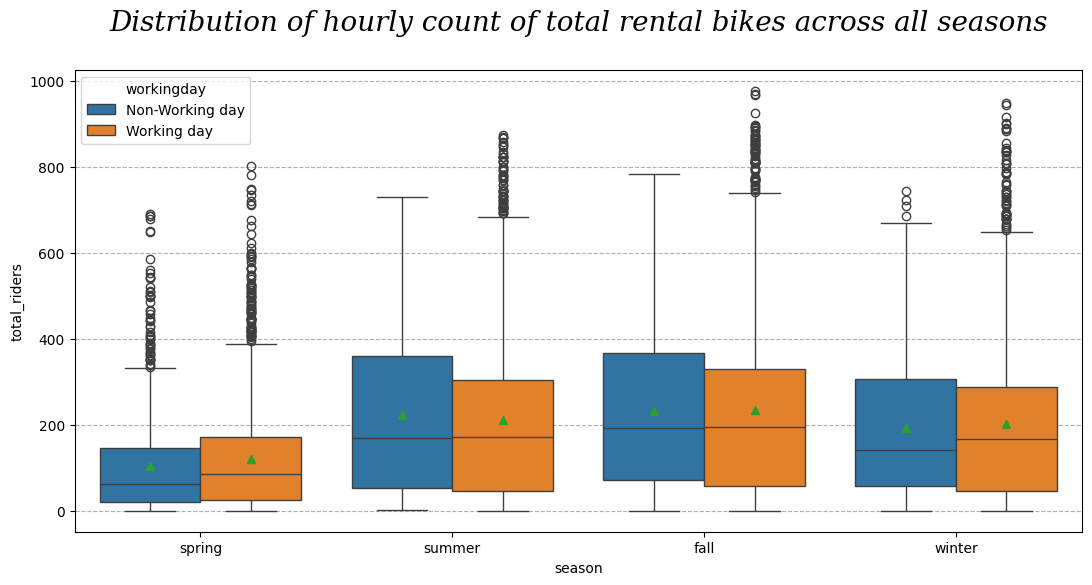

In [38]:
plt.figure(figsize = (13, 6))
plt.title(f'Distribution of hourly count of total rental bikes across all seasons\n',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = bike_data, x = 'season', y = 'total_riders', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.show()

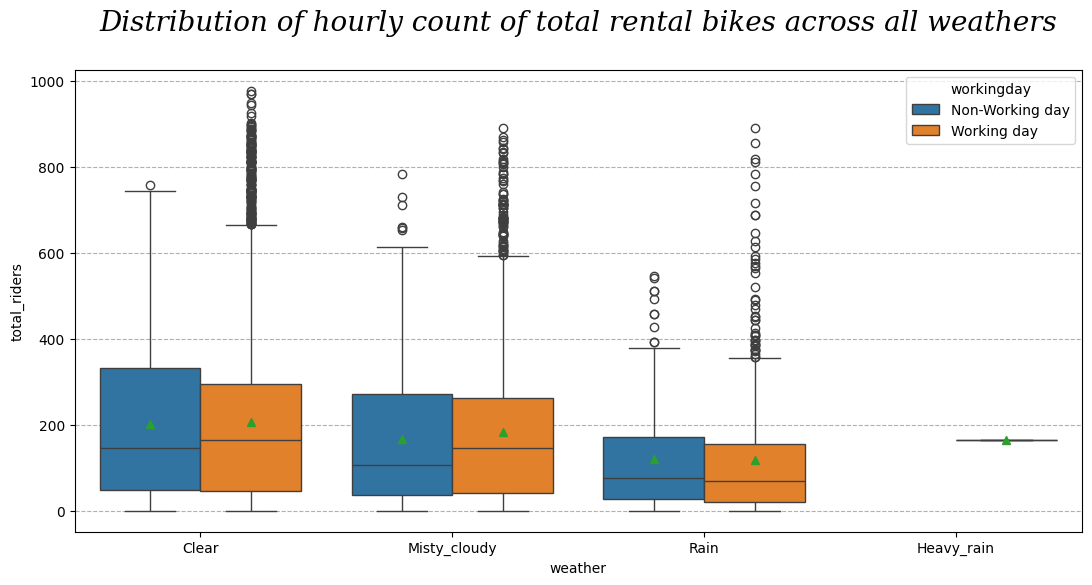

In [39]:
plt.figure(figsize = (13, 6))
plt.title(f'Distribution of hourly count of total rental bikes across all weathers\n',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = bike_data, x = 'weather', y = 'total_riders', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.show()

# Hypothesis Testing:

## **Is there any effect of Working Day on the number of electric cycles rented ?**

**STEP-1 :** Set up Null Hypothesis

* Null Hypothesis ( H0 ) - No.of bikes rented on working days and non working days are same.

* Alternate Hypothesis ( HA ) - No.of bikes rented on working days and non working days are different.

\

---

**STEP-2 :** Checking for basic assumpitons for the hypothesis

* Normality checks

* Distribution check using QQ Plot

* Distribution check using prob Plot

* Confirmation by Shapiro-wilks Test

* Homogeneity of Variances using Levene's test

\

---


**STEP-3:** Define Test statistics; Distribution of T under Ho.

* We know that the test statistic while performing a T-Test follows Tdistribution.

* If data follows normal distribution we go with ttest_ind
* Else we will go with Mannwhitney_u test (Non - Parametric test)


\

---


**STEP-4:** Decide the kind of test.

* We will be performing Two tailed t-test for indpependent variables

\

---


**STEP-5:**  Compute the p-value and fix value of alpha.

* we will be computing the t-stat value using the ttest function using scipy.stats.
* We set our alpha to be 0.05 (i.e) confidence level = 95%

\

---


**STEP-6:** Compare p-value and alpha.

* Based on p-value, we will accept or reject H0.

    p-val > alpha : Accept Ho

    p-val < alpha : Reject Ho

\

In [40]:
workingday = bike_data[bike_data['workingday']== 'Working day']['total_riders']
non_workingday = bike_data[bike_data['workingday']== 'Non-Working day']['total_riders']

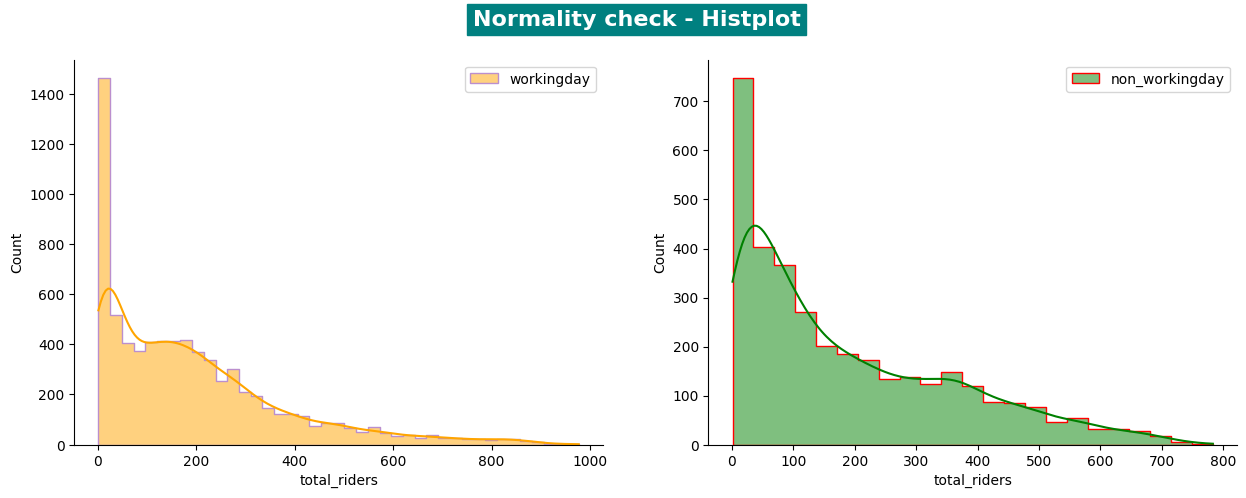

In [41]:
plt.figure(figsize = (15, 5))
plt.suptitle("Normality check - Histplot",fontsize=16,fontweight="bold",backgroundcolor='teal',color='w')

plt.subplot(121)
sns.histplot(workingday, element = 'step', color='orange', edgecolor='#BB8FCE', kde = True, label = 'workingday')
plt.legend()

plt.subplot(122)
sns.histplot(non_workingday,element = 'step', color='green', edgecolor='red', kde = True, label = 'non_workingday')
plt.legend()
sns.despine()
plt.show()

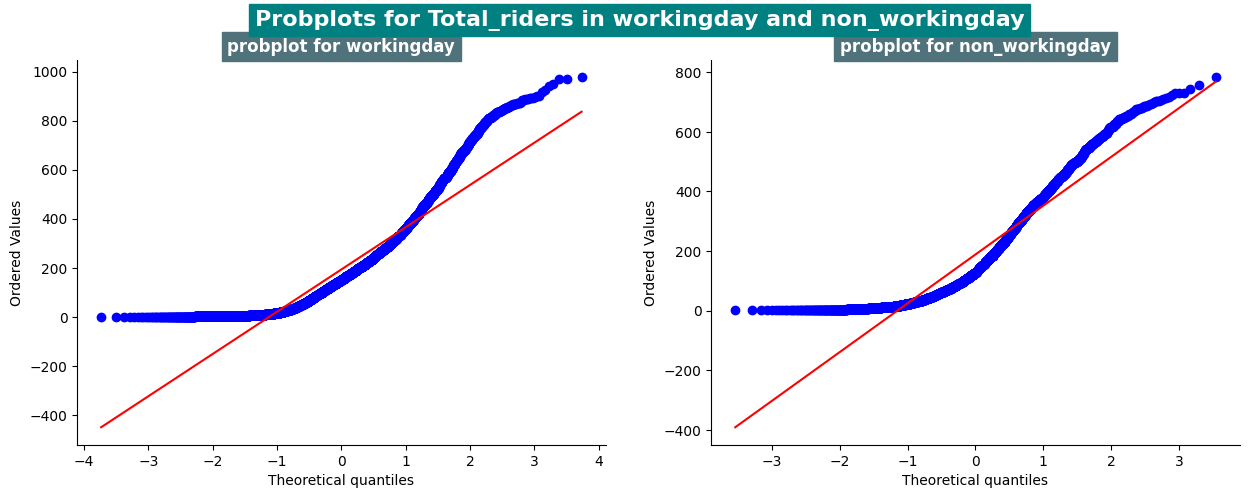

In [42]:
plt.figure(figsize = (15, 5))

plt.subplot(121)
plt.suptitle('Probplots for Total_riders in workingday and non_workingday',fontsize=16,fontweight="bold",backgroundcolor='teal',color='w')
probplot(workingday, plot = plt, dist = 'norm')
plt.title('probplot for workingday',fontsize=12,fontweight="bold",backgroundcolor= '#50727B',color='w')

plt.subplot(122)
probplot(non_workingday, plot = plt, dist = 'norm')
plt.title('probplot for non_workingday',fontsize=12,fontweight="bold",backgroundcolor= '#50727B',color='w')
sns.despine()
plt.show()

## can also do qqplot

> It can be inferred from the above plot that the distributions do not follow normal distribution.

**Distribution check using QQ Plot**

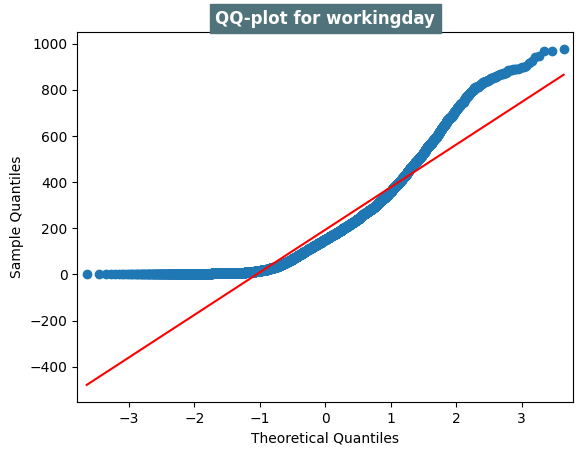

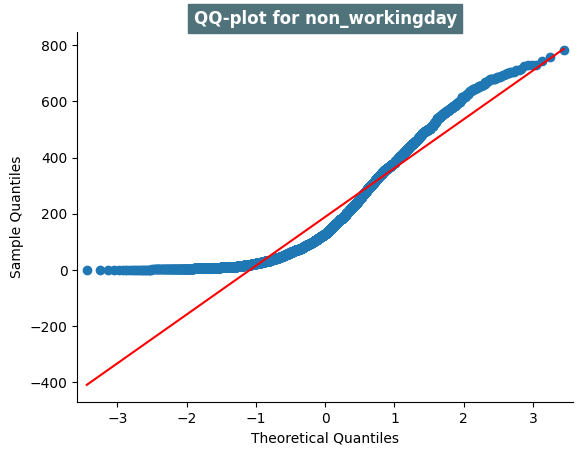

In [43]:
sm.qqplot(workingday,line='s')
plt.title('QQ-plot for workingday',fontsize=12,fontweight="bold",backgroundcolor='#50727B',color='w')

sm.qqplot(non_workingday,line='s')
plt.title('QQ-plot for non_workingday',fontsize=12,fontweight="bold",backgroundcolor='#50727B',color='w')

sns.despine()
plt.show()

**Shapiro test for workingday**

* Null Hypothesis -- Ho -- Data is Gaussian

* Alternate Hypothesis -- Ha -- Data is not Gaussian

In [44]:
shapiro_stat , p_val = shapiro(workingday)
print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}")

if p_val <= 0.05:
    print('Data does not follow normal distribution')
else:
    print('Data follows a normal distribution')

shapiro_stat : 0.8702582120895386 , p_value : 0.0
Data does not follow normal distribution


In [45]:
shapiro_stat , p_val = shapiro(non_workingday)
print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}")

if p_val <= 0.05:
    print('Data does not follow normal distribution')
else:
    print('Data follows a normal distribution')

shapiro_stat : 0.8852126598358154 , p_value : 4.203895392974451e-45
Data does not follow normal distribution


**Levene test for variance**

* Null Hypothesis(Ho) - Homogenous Variance .. Both Datas has similar variance

* Alternate Hypothesis(HA) - Non Homogenous Variance .. Both Datas has different variance

In [46]:
levene_stat, p_value = levene(workingday,non_workingday)

print('Levene_stat : ', levene_stat)
print('p-value : ', p_value)

if p_value <= 0.05:
    print('The samples do not have  Homogenous Variance -- has different variance')
else:
    print('The samples have Homogenous Variance -- has similar variance')

Levene_stat :  0.004972848886504472
p-value :  0.9437823280916695
The samples have Homogenous Variance -- has similar variance


**Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples. But we will try to compare both tests.....**

In [47]:
# Test statistics : Ttest for two independent samples

test_stat, p_value = ttest_ind(workingday,non_workingday)

print(f'ttest_stat : ',test_stat)
print('P-value :',p_value)

if p_value < 0.05:
    print("Reject Null Hypothesis")
    print('No.of bikes rented is not same for working and non-working days')
else:
    print("Failed to Reject Null Hypothesis - Accept Ho")
    print('No.of bikes rented is same for working and non-working days')

ttest_stat :  1.2096277376026694
P-value : 0.22644804226361348
Failed to Reject Null Hypothesis - Accept Ho
No.of bikes rented is same for working and non-working days


In [48]:
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = mannwhitneyu(workingday,non_workingday)

print(f'Mannwhitneyu_stat : ',test_stat)
print('P-value :',p_value)

if p_value <= 0.05:
    print("Reject Null Hypothesis")
    print('No.of bikes rented is not same for working and non-working days')
else:
    print("Failed to Reject Null Hypothesis - Accept Ho")
    print('No.of bikes rented is same for working and non-working days')

Mannwhitneyu_stat :  12868495.5
P-value : 0.9679139953914079
Failed to Reject Null Hypothesis - Accept Ho
No.of bikes rented is same for working and non-working days


#### **Insights:**

> **[In Both ttest_ind & in MannWhitney-u-Rank test we find that "Mean No.of bikes rented is same for working and non-working days]()**

####**Recommendations**

1. Targeted marketing strategies: Consider implementing targeted marketing strategies to attract more customers on both working and non-working days. Identify specific promotions or offers that appeal to a diverse range of customers, regardless of their employment status.

2. Operational adjustments: Ensure that operational processes, such as bike availability, maintenance, and customer service, are consistent and optimized for both working and non-working days. Provide a seamless experience for customers on all days to enhance customer satisfaction and retention.

3. Customer engagement: Implement engagement initiatives to build loyalty and encourage repeat business from customers on all days of the week. Offer personalized services or rewards programs that cater to the needs and preferences of different customer segments, regardless of their work schedules.

4. Market research: Conduct further market research to understand the preferences and behaviors of customers on working and non-working days. Use this information to tailor your offerings and services to meet the specific needs of customers based on their availability and schedule.

5. Collaboration opportunities: Explore partnership opportunities with local businesses, events, or organizations to drive foot traffic and increase bike rentals on both working and non-working days. Collaborative marketing efforts can help expand your customer base and boost rental revenue across all days of the week.

## **Checking if number of bikes rented is same or different in different weather**

In [49]:
bike_data.weather.value_counts()

Clear           7192
Misty_cloudy    2834
Rain             859
Heavy_rain         1
Name: weather, dtype: int64

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other.

Specifically, it tests the null hypothesis (H0):

**`µ1 = µ2 = µ3 = ..... = µk`**

where, µ = group mean and k = number of groups.

If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other.

\

---

**STEP-1 :** Set up Null Hypothesis

Null Hypothesis(Ho) - The mean of bikes rented is same for across weather conditions.

(We wont be considering 'HeavyRain' as there in only 1 data point and we cannot perform a ANOVA test with a single data point for a group.)

Alternate Hypothesis(Ha) - The mean number of bikes rented is different across at least two weather conditions.

\

---

**STEP-2 :** Checking for basic assumptions for the hypothesis

Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

Homogeneity of Variances using Levene's test

Each observations are independent.

\

---
**STEP-3:** Define Test statistics; Distribution of T under H0.

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

F=MSR/MSE

Under H0, the test statistic should follow F-Distribution.

\

---

**STEP-4:** Decide the kind of test.

We will be performing right tailed t-test becuz of the data right skewness

\

---

**STEP-5:** Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

\

---

**STEP-6:** Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0

\

In [50]:
bike_data.groupby('weather').count()

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,total_riders,year,month,hour
weather,,,,,,,,,,,,,,
Clear,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192
Misty_cloudy,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834
Rain,859,859,859,859,859,859,859,859,859,859,859,859,859,859
Heavy_rain,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [51]:
Clear = bike_data[bike_data['weather']=='Clear']['total_riders']
misty_cloudy = bike_data[bike_data['weather']=='Misty_cloudy']['total_riders']
Rain = bike_data[bike_data['weather']=='Rain']['total_riders']
Heavy_rain = bike_data[bike_data['weather']=='Heavy rain']['total_riders']

**Normality Check:**

Plot checks:

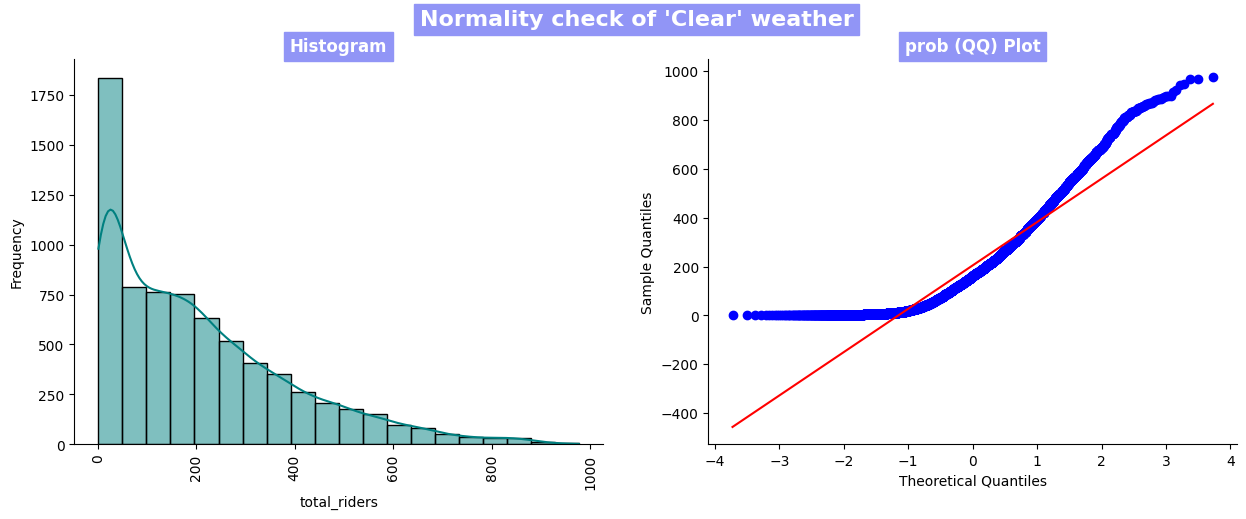

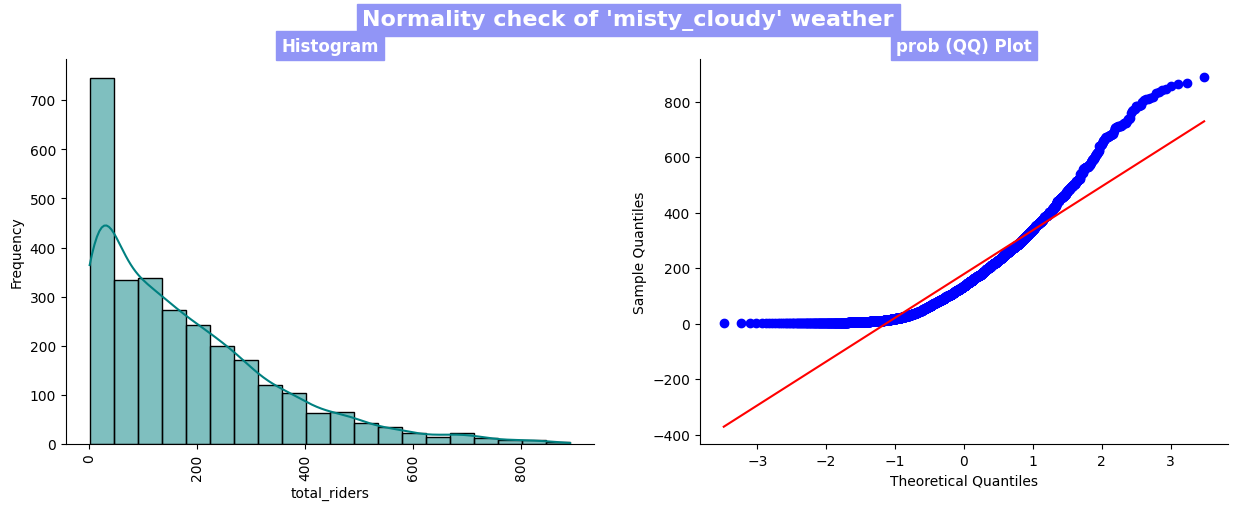

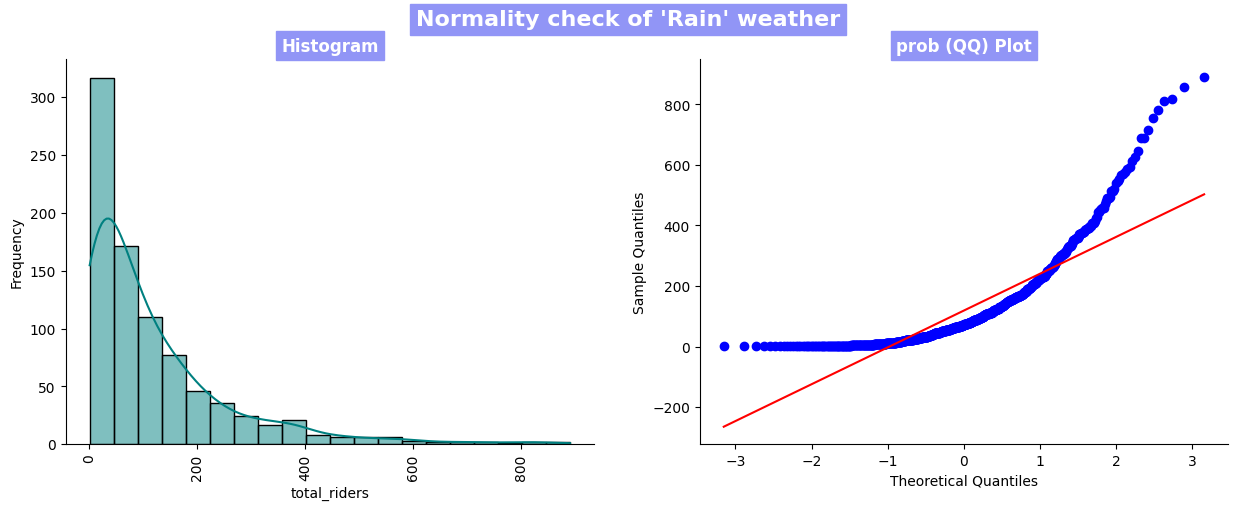

In [52]:
weather_cols = {'Clear':Clear, 'misty_cloudy':misty_cloudy, 'Rain': Rain}

for col_name,data in weather_cols.items():
    plt.figure(figsize=(15,5))
    plt.suptitle(f'Normality check of \'{col_name}\' weather',fontsize=16,fontweight="bold",backgroundcolor='#9195F6',color='w')

    plt.subplot(121)
    sns.histplot(data, bins=20,kde=True,color='teal')
    plt.ylabel('Frequency')
    plt.title(f'Histogram',fontsize=12,fontweight="bold",backgroundcolor='#9195F6',color='w')
    plt.xticks(rotation=90)

    plt.subplot(122)
    probplot(data, dist='norm', plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'prob (QQ) Plot',fontsize=12,fontweight="bold",backgroundcolor='#9195F6',color='w')

    sns.despine()
    plt.show()

> It can be inferred from the above plot that the distributions do not follow normal distribution.

It doesnt also satisfy the QQ - Plots.

> To perform ANOVA, we need our groups to be gaussian distributed. So, we will perform BOX-COX transform to change the distribution of these groups to normal.

In [53]:
boxcoxed_Clear, best_lambda = boxcox(Clear)
boxcoxed_Misty_cloudy , best_lambda = boxcox(misty_cloudy)
boxcoxed_Rain , best_lambda = boxcox(Rain)

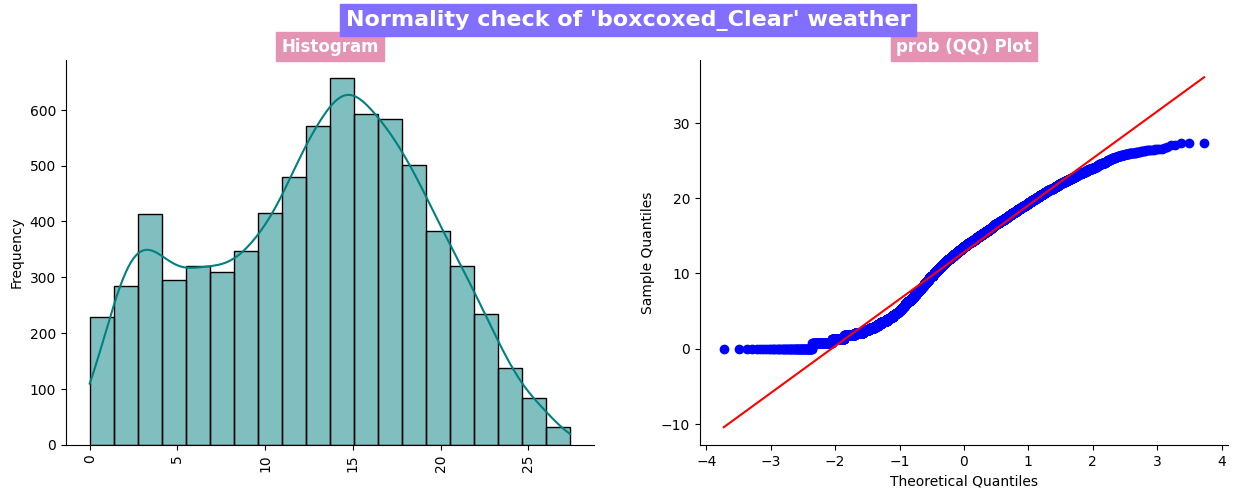

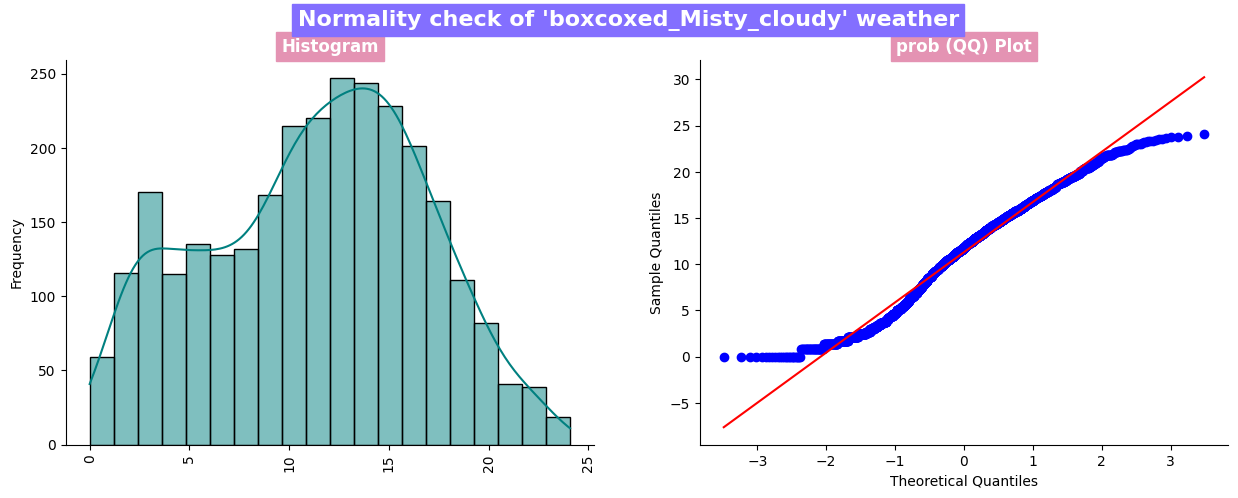

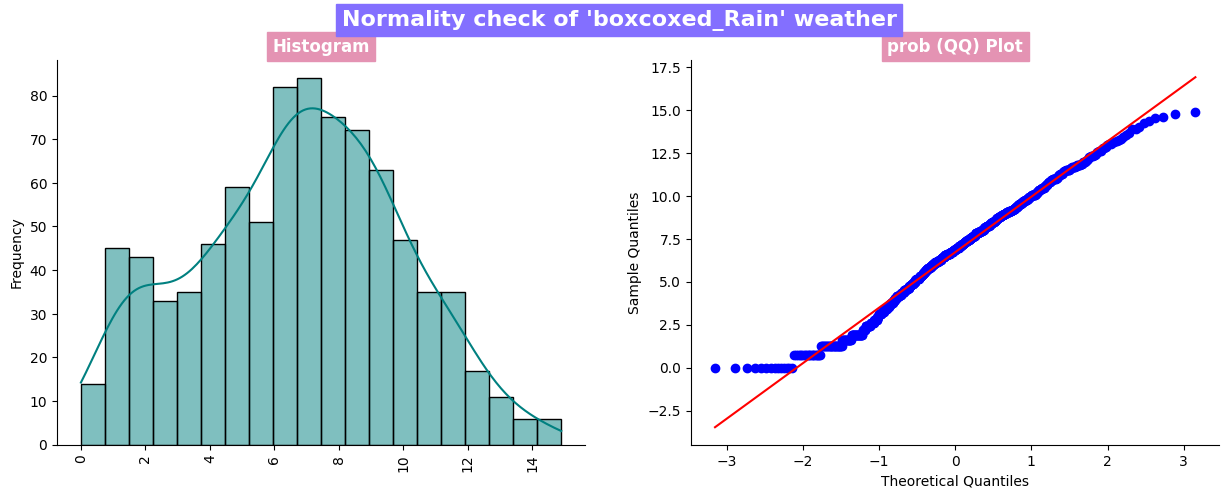

In [54]:
weather_cols = {'boxcoxed_Clear':boxcoxed_Clear, 'boxcoxed_Misty_cloudy':boxcoxed_Misty_cloudy, 'boxcoxed_Rain':boxcoxed_Rain}

for col_name,data in weather_cols.items():
    plt.figure(figsize=(15,5))
    plt.suptitle(f'Normality check of \'{col_name}\' weather',fontsize=16,fontweight="bold",backgroundcolor='#836FFF',color='w')

    plt.subplot(121)
    sns.histplot(data, bins=20,kde=True,color='teal')
    plt.ylabel('Frequency')
    plt.title(f'Histogram',fontsize=12,fontweight="bold",backgroundcolor='#E493B3',color='w')
    plt.xticks(rotation=90)

    plt.subplot(122)
    probplot(data, dist='norm', plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'prob (QQ) Plot',fontsize=12,fontweight="bold",backgroundcolor='#E493B3',color='w')

    sns.despine()
    plt.show()

**Shapiro-Wilk Test:**

In [55]:
weather_cols ={'Clear':Clear, 'misty_cloudy':misty_cloudy, 'Rain': Rain}

for col_name,data in weather_cols.items():
    shapiro_stat , p_val = shapiro(data)
    print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}")

    if p_val <= 0.05:
        print(f'Data {col_name} is not Gaussian distribution')
        print()
    else:
        print(f'Data {col_name} is Gaussian distribution')
        print()
    print('-'*125)

shapiro_stat : 0.8909230828285217 , p_value : 0.0
Data Clear is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------
shapiro_stat : 0.8767687082290649 , p_value : 9.781063280987223e-43
Data misty_cloudy is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------
shapiro_stat : 0.7674332857131958 , p_value : 3.876090133422781e-33
Data Rain is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------


In [56]:
weather_cols = {'boxcoxed_Clear':boxcoxed_Clear, 'boxcoxed_Misty_cloudy':boxcoxed_Misty_cloudy, 'boxcoxed_Rain':boxcoxed_Rain}

for col_name,data in weather_cols.items():
    shapiro_stat , p_val = shapiro(data)
    print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}")

    if p_val < 0.05:
        print(f'Data {col_name} is not Gaussian distribution')
        print()
    else:
        print(f'Data {col_name} is Gaussian distribution')
        print()
    print('-'*125)

shapiro_stat : 0.9771609306335449 , p_value : 2.061217589223373e-32
Data boxcoxed_Clear is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------
shapiro_stat : 0.9802151918411255 , p_value : 1.9216098393369846e-19
Data boxcoxed_Misty_cloudy is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------
shapiro_stat : 0.9877902269363403 , p_value : 1.4133181593933841e-06
Data boxcoxed_Rain is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------


**Both original data and the Boxcoxed data doesn't follow the normal distribution, so We cannot perform Anova. We will have to go with the Kruskel-Walis H Test. But, we will try to do Anova as well as Kruskal test and try to compare the difference.**


**Levene test for variance**

* Null Hypothesis(Ho) - Homogenous Variance .. Both Datas has similar variance

* Alternate Hypothesis(HA) - Non Homogenous Variance .. Both Datas has different variance

In [57]:
levene_stat, p_value = levene(Clear,misty_cloudy,Rain)

print('Levene_stat : ', levene_stat)
print('p-value : ', p_value)

if p_value <= 0.05:
    print('The samples do not have  Homogenous Variance -- has different variance')
else:
    print('The samples have Homogenous Variance -- has similar variance')

Levene_stat :  81.67574924435011
p-value :  6.198278710731511e-36
The samples do not have  Homogenous Variance -- has different variance


**Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.**

**KRUSKAL_WALIS H TEST**

In [58]:
alpha = 0.05
test_stat, p_value = kruskal(Clear,misty_cloudy,Rain)
print('Test Statistic =', test_stat)
print('p value =', p_value)

if p_value <= alpha:
    print('Reject Null Hypothesis')
    print("The mean number of bikes rented is different across at weather conditions")
else:
    print('Failed to reject Null Hypothesis')
    print("The mean of bikes rented is same for across weather conditions.")

Test Statistic = 204.95566833068537
p value = 3.122066178659941e-45
Reject Null Hypothesis
The mean number of bikes rented is different across at weather conditions


In [59]:
weather_groups = bike_data.groupby('weather')['total_riders'].apply(list)
f_statistic, p_value_weather = f_oneway(*weather_groups)
# Set significance level (alpha)
alpha = 0.05
# Determine whether to accept or reject the null hypothesis
if p_value_weather < alpha:
  conclusion_weather = "Reject the null hypothesis"
else:
  conclusion_weather = "Fail to reject the null hypothesis"
# Interpretation
if p_value < alpha:
  interpretation_weather = "At least one weather condition has a different effect on the number of cycles rented."
else:
  interpretation_weather =" All seasons have the same effect on the number of cycles rented."
## ANOVA for season
season_groups = bike_data.groupby('season')['total_riders'].apply(list)
f_statistic_season, p_value_season = f_oneway(*season_groups)
# Set significance level (alpha)
alpha = 0.05
# Determine season to accept or reject the null hypothesis
if p_value_season < alpha:
  conclusion_season = "Reject the null hypothesis"
else:
  conclusion_season = "Fail to reject the null hypothesis"
if p_value_season < alpha:
  interpretation_season = "At least one season has a different effect on the number of cycles rented."
else:
  interpretation_season ="All seasons have the same effect on the number of cycles rented."
print("f_statistic:",f_statistic,'\n',"p_value_weather ",p_value_weather,'\n',"interpretation_weather ",interpretation_weather,'\n',"f_statistic_season:" ,f_statistic_season,'\n',"p_value_season ",p_value_season,'\n',"interpretation_season:",interpretation_season)

f_statistic: 65.53024112793271 
 p_value_weather  5.482069475935669e-42 
 interpretation_weather  At least one weather condition has a different effect on the number of cycles rented. 
 f_statistic_season: 236.94671081032106 
 p_value_season  6.164843386499654e-149 
 interpretation_season: At least one season has a different effect on the number of cycles rented.


In [60]:
test_stat, p_value = f_oneway(Clear,misty_cloudy,Rain)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 98.28356881946706
p value = 4.976448509904196e-43


In [61]:
month_order = ['January', 'February', 'March', 'April', 'May',
               'June', 'July', 'August', 'September',
               'October', 'November', 'December']
bike_data['month']= pd.Categorical(bike_data['month'],categories=month_order, ordered=True)

year        2011                                  2012                      \
weather    Clear Misty_cloudy  Rain Heavy_rain   Clear Misty_cloudy   Rain   
month                                                                        
January    15882         6936   734          0   43195        11008   1965   
February   24210         7442  1192          0   42586        18156   5527   
March      26351        11643   741          0   70785        21221   2760   
April      29609        17112  3796          0   96327        17980   2578   
May        51408        21220  7085          0   79046        35325   6063   
June       66244        19109  4423          0  103716        23431   3810   
July       80452        10699  1697          0   90302        26057   5410   
August     64061        14032  5203          0   90499        33524   6197   
September  45949        26914  6241          0   98853        28160   6412   
October    54212        17514  7796          0   79356        37311  11245   
November   53311        14819  2759          0   73685        29434   2432   
December   43125        16170  1888          0   52899        41943   4135   

year                  
weather   Heavy_rain  
month                 
January          164  
February           0  
March              0  
April              0  
May                0  
June               0  
July               0  
August             0  
September          0  
October            0  
November           0  
December           0

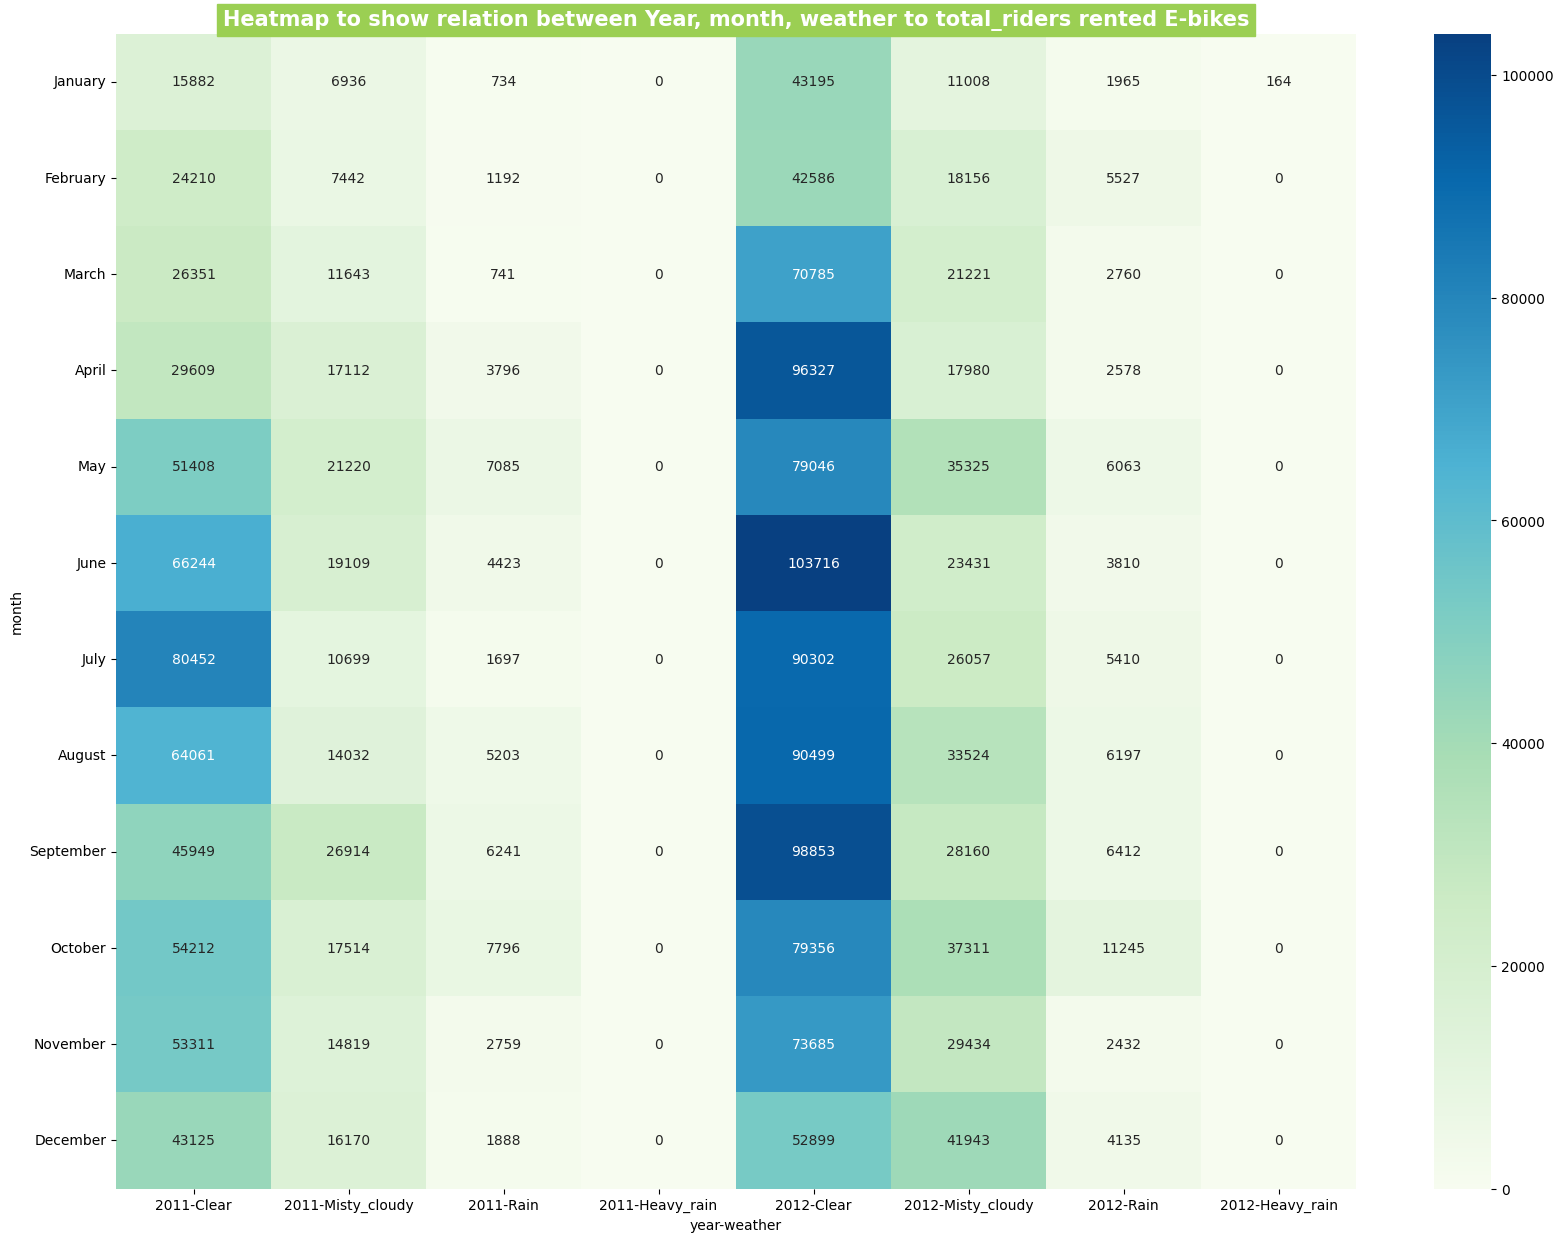

In [62]:
ymw=bike_data.groupby(['year','month','weather'])['total_riders'].sum()
data= ymw.unstack(level=[0,2])
data.replace(np.nan,0, inplace=True)
display(data)

plt.figure(figsize=(20,15))
sns.heatmap(data, annot=True, fmt='.6g',cmap='GnBu')
plt.title('Heatmap to show relation between Year, month, weather to total_riders rented E-bikes',
          fontsize=15,fontweight="bold",backgroundcolor='#9BCF53',color='w')
plt.yticks(rotation=0)
plt.show()

#### **Insights:**

[The results of the one-way ANOVA tests are as follows:]()
1. For Weather:
* F-statistic: 65.53
* P-value: 5.48e-42 (very close to 0)
2. For Season:
* F-statistic: 236.95
* P-value: 6.16e-149 (very close to 0)

[These results indicate the following:]()
1. Weather: The p-value for the ANOVA test on weather is extremely low (close to 0), which means that there are statistically significant differences in the number of cycles rented based on different weather conditions.

2. Season: Similarly, the p-value for the ANOVA test on season is also extremely low (close to 0), indicating that there are statistically significant differences in the number of cycles rented across different seasons.


> In summary, the number of cycles rented varies significantly with both weather conditions and seasons. This information is valuable for Yulu to understand the impact of these factors on demand and make informed operational decisions.

> The data visualization and ANOVA test indicate that both weather and season have a significant impact on cycle rentals. This confirms the alternative hypothesis (Ha), suggesting that different weather and season categories influence the number of cycle rentals.

**`From both the Krukal-walis test & ANOVA test , we can confirm that The mean number of E-bikes rented differs across various weather conditions.`**

#### **Recommendations**

Based on the results of the ANOVA tests, it is recommended for Yulu to consider weather and season when making decisions about operational strategies, such as pricing, marketing, and inventory management. They should analyze the data further to understand the specific trends and patterns in cycle rentals based on different weather conditions and seasons. Additionally, they may want to consider implementing targeted promotions or discounts during certain weather or season categories to maximize rental demand. Monitoring and adjusting strategies based on these findings can help Yulu optimize their operations and increase profitability.


## **Checking if number of bikes rented is similar or different in different Seasons**

In [63]:
bike_data.season.unique()

['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['spring', 'summer', 'fall', 'winter']

In [64]:
bike_data.groupby('season')['total_riders'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other.

\

**STEP-1 :** Set up Null Hypothesis

Null Hypothesis(Ho) - The mean of bikes rented is same for across various Seasons.

Alternate Hypothesis(Ha) - The mean number of bikes rented is different for across various seasons.

\

---


**STEP-2 :** Checking for basic assumptions for the hypothesis

Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

Homogeneity of Variances using Levene's test

Each observations are independent.

\

---


**STEP-3:** Define Test statistics; Distribution of T under H0.

The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

F=MSR/MSE

Under H0, the test statistic should follow F-Distribution.

\

---


**STEP-4:** Decide the kind of test.

We will be performing right tailed t-test becuz of the data right skewness

\

---


**STEP-5:** Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

\

---

**STEP-6:** Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0

\

In [65]:
summer = bike_data[bike_data['season']=='summer']['total_riders']
winter = bike_data[bike_data['season']=='winter']['total_riders']
fall = bike_data[bike_data['season']=='fall']['total_riders']
spring = bike_data[bike_data['season']=='spring']['total_riders']

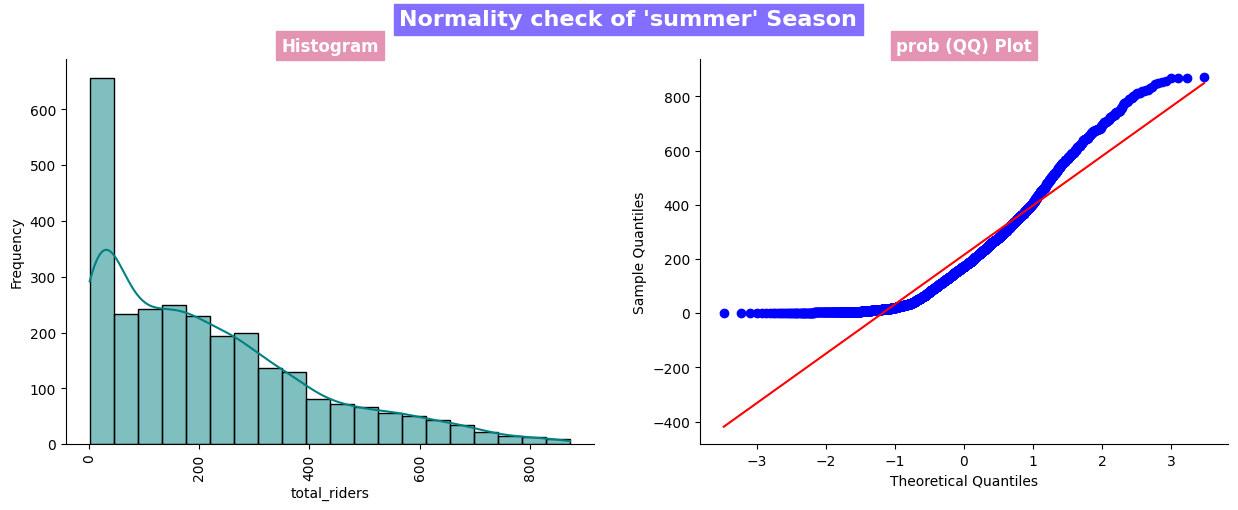

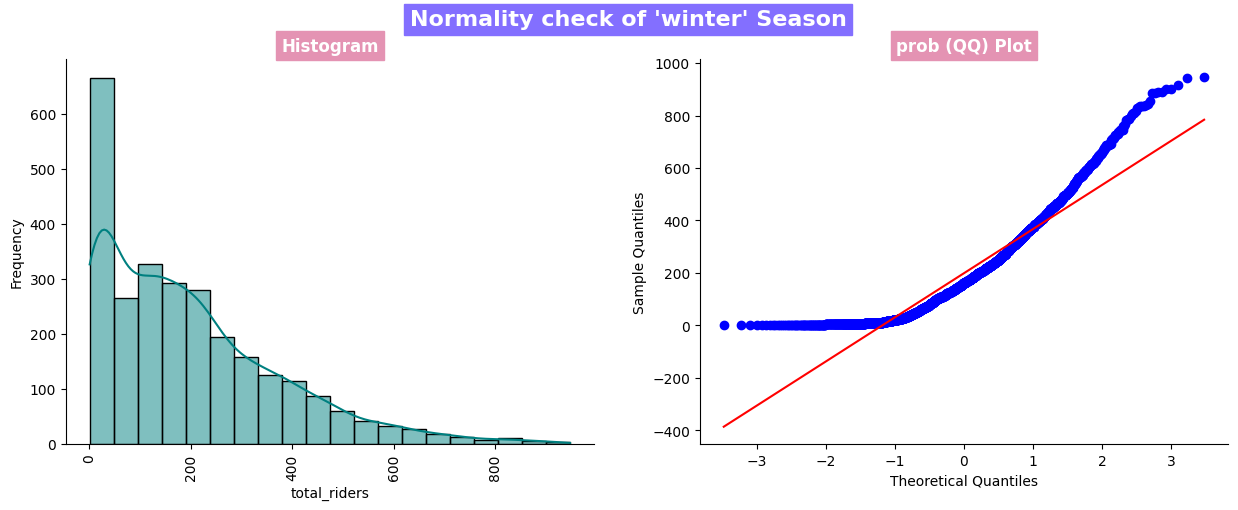

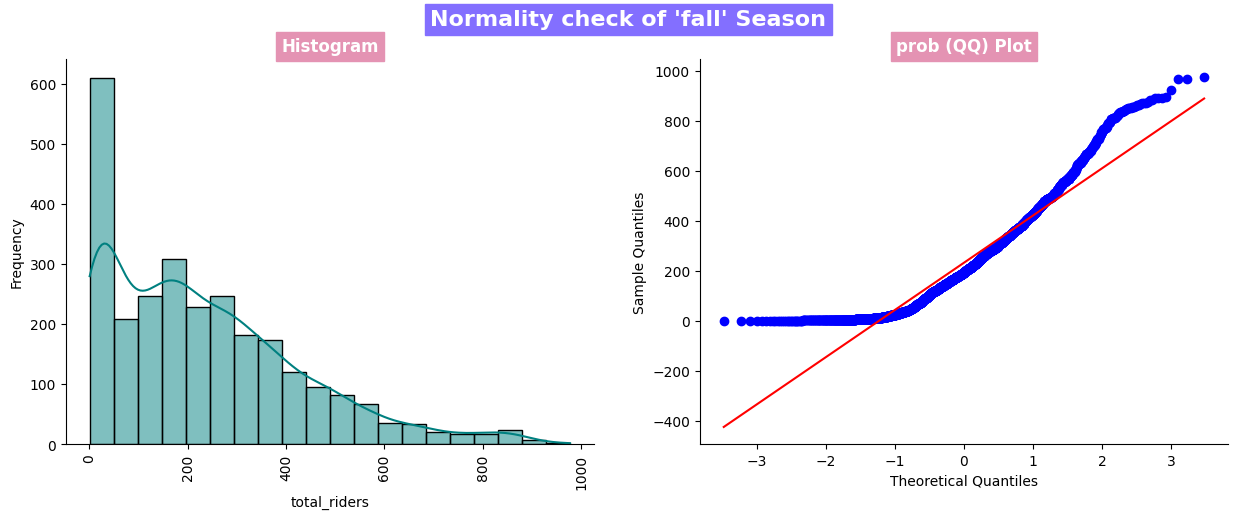

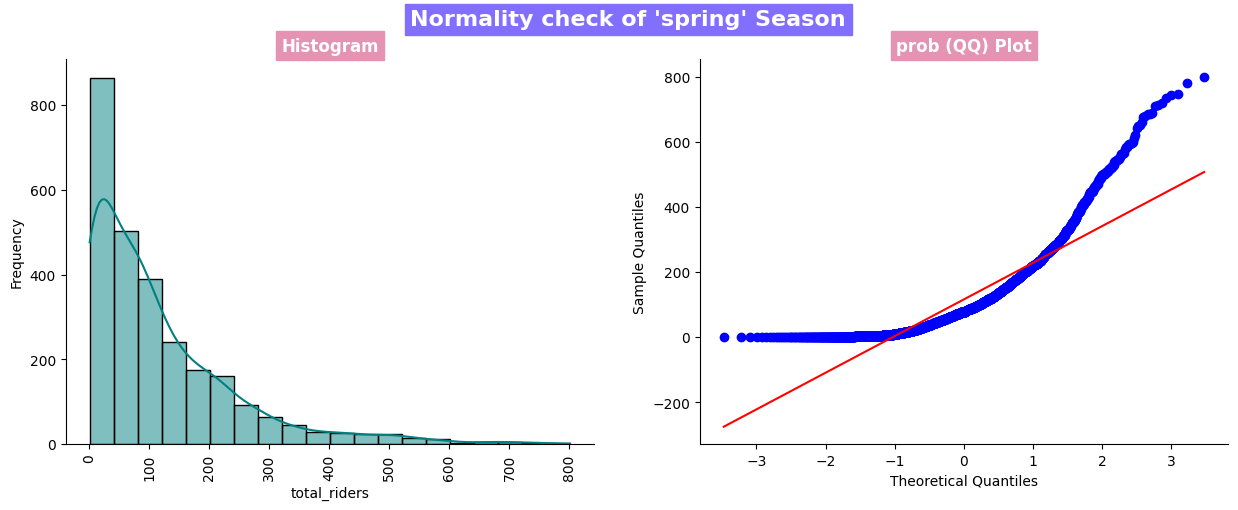

In [66]:
season_cols = {'summer':summer , 'winter':winter , 'fall':fall, 'spring':spring}

for col_name,data in season_cols.items():
    plt.figure(figsize=(15,5))
    plt.suptitle(f'Normality check of \'{col_name}\' Season',fontsize=16,fontweight="bold",backgroundcolor='#836FFF',color='w')

    plt.subplot(121)
    sns.histplot(data, bins=20,kde=True,color='teal')
    plt.ylabel('Frequency')
    plt.title(f'Histogram',fontsize=12,fontweight="bold",backgroundcolor='#E493B3',color='w')
    plt.xticks(rotation=90)

    plt.subplot(122)
    probplot(data, dist='norm', plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'prob (QQ) Plot',fontsize=12,fontweight="bold",backgroundcolor='#E493B3',color='w')

    sns.despine()
    plt.show()

> It can be inferred from the above plot that the distributions do not follow normal distribution.

> It doesnt also satisfy the QQ - Plots.

> To perform ANOVA, we need our groups to be gaussian distributed. So, we will perform BOX-COX transform to change the distribution of these groups to normal.

\

**Lets try BOX-COX Transformation**

In [67]:
boxcoxed_summer , best_lambda = boxcox(summer)
boxcoxed_winter , best_lambda = boxcox(winter)
boxcoxed_fall , best_lambda = boxcox(fall)
boxcoxed_spring , best_lambda = boxcox(spring)

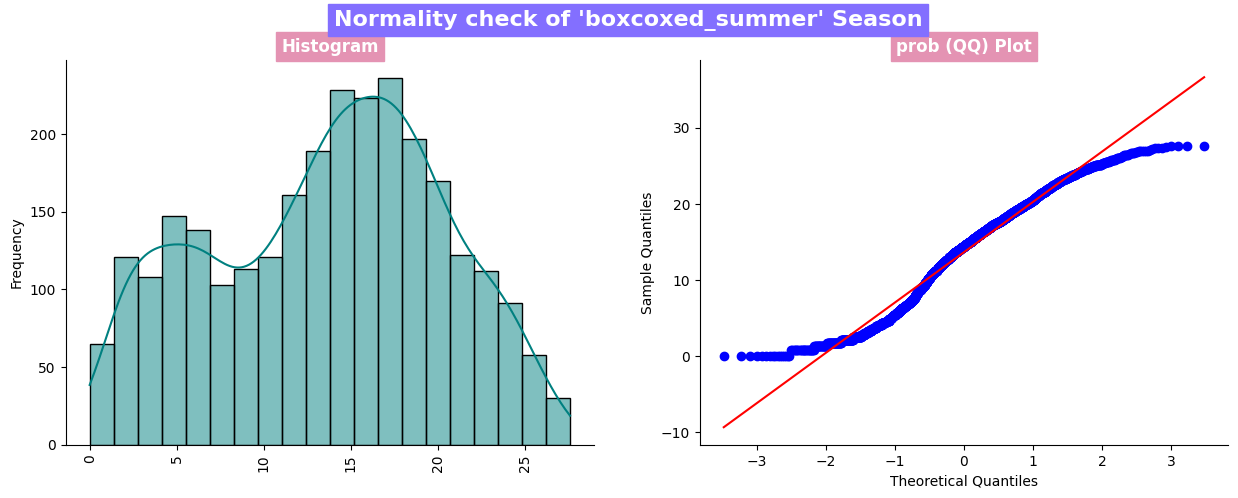

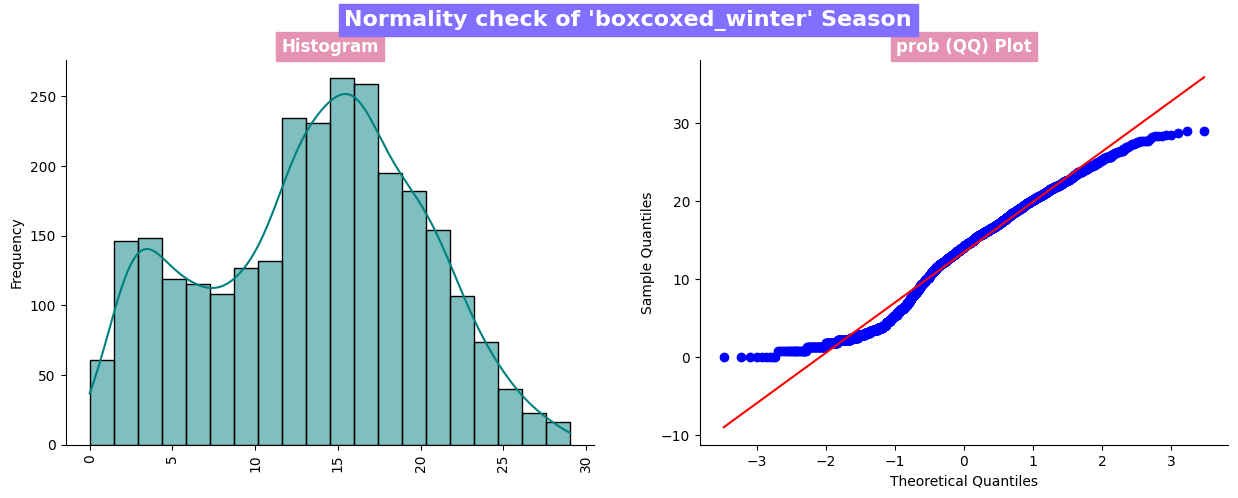

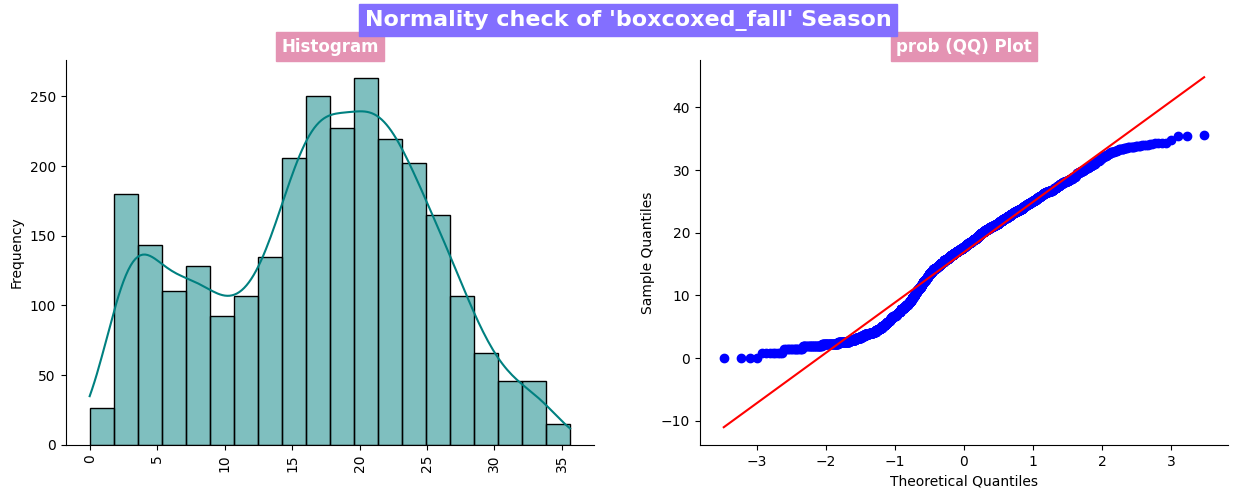

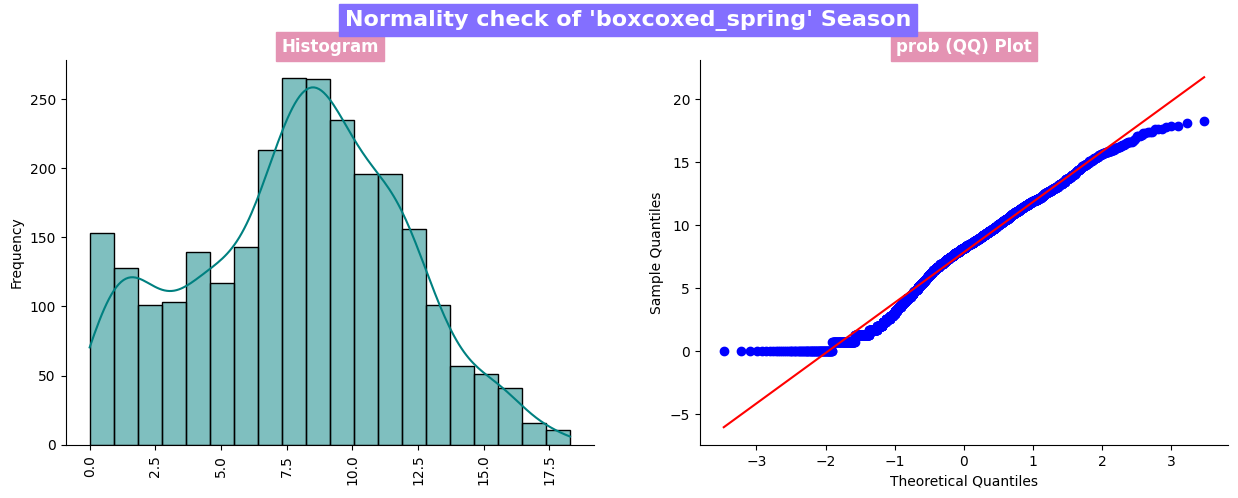

In [68]:
season_cols = {'boxcoxed_summer':boxcoxed_summer, 'boxcoxed_winter':boxcoxed_winter,
                'boxcoxed_fall':boxcoxed_fall, 'boxcoxed_spring':boxcoxed_spring}

for col_name,data in season_cols.items():
    plt.figure(figsize=(15,5))
    plt.suptitle(f'Normality check of \'{col_name}\' Season',fontsize=16,fontweight="bold",backgroundcolor='#836FFF',color='w')

    plt.subplot(121)
    sns.histplot(data, bins=20,kde=True,color='teal')
    plt.ylabel('Frequency')
    plt.title(f'Histogram',fontsize=12,fontweight="bold",backgroundcolor='#E493B3',color='w')
    plt.xticks(rotation=90)

    plt.subplot(122)
    probplot(data, dist='norm', plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'prob (QQ) Plot',fontsize=12,fontweight="bold",backgroundcolor='#E493B3',color='w')

    sns.despine()
    plt.show()

**Shapiro-Wilk Test:**

In [69]:
season_cols = {'summer':summer , 'winter':winter , 'fall':fall, 'spring':spring}

for col_name,data in season_cols.items():
    shapiro_stat , p_val = shapiro(data)
    print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}")

    if p_val < 0.05:
        print(f'Data {col_name} is not Gaussian distribution')
        print()
    else:
        print(f'Data {col_name} is Gaussian distribution')
        print()
    print('-'*125)

shapiro_stat : 0.900481641292572 , p_value : 6.039093315091269e-39
Data summer is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------
shapiro_stat : 0.8954644799232483 , p_value : 1.1301682309549298e-39
Data winter is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------
shapiro_stat : 0.9148160815238953 , p_value : 1.043458045587339e-36
Data fall is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------
shapiro_stat : 0.8087388873100281 , p_value : 0.0
Data spring is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------


In [70]:
season_cols = {'boxcoxed_summer':boxcoxed_summer, 'boxcoxed_winter':boxcoxed_winter,
                'boxcoxed_fall':boxcoxed_fall, 'boxcoxed_spring':boxcoxed_spring}
for col_name,data in season_cols.items():
    shapiro_stat , p_val = shapiro(data)
    print(f"shapiro_stat : {shapiro_stat} , p_value : {p_val}")

    if p_val < 0.05:
        print(f'Data {col_name} is not Gaussian distribution')
        print()
    else:
        print(f'Data {col_name} is Gaussian distribution')
        print()
    print('-'*125)

shapiro_stat : 0.9730892181396484 , p_value : 2.7910560207702335e-22
Data boxcoxed_summer is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------
shapiro_stat : 0.9763026833534241 , p_value : 6.342709865441161e-21
Data boxcoxed_winter is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------
shapiro_stat : 0.9733710289001465 , p_value : 3.6319999210910884e-22
Data boxcoxed_fall is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------
shapiro_stat : 0.9828581213951111 , p_value : 1.7082116755999925e-17
Data boxcoxed_spring is not Gaussian distribution

-----------------------------------------------------------------------------------------------------------------------------


**Both original data and the Boxcoxed data doesn't follow the normal distribution, so We cannot perform Anova. We will have to go with the Kruskel-Walis H Test. But, we will try to do Anova as well as Kruskal test and try to compare the difference.**

**Levene test for variance**

> Null Hypothesis(Ho) - Homogenous Variance .. Both Datas has similar variance

> Alternate Hypothesis(HA) - Non Homogenous Variance .. Both Datas has different variance

In [71]:
levene_stat, p_value = levene(summer,winter,fall,spring)

print('Levene_stat : ', levene_stat)
print('p-value : ', p_value)

if p_value < 0.05:
    print('The samples do not have  Homogenous Variance -- has different variance')
else:
    print('The samples have Homogenous Variance -- has similar variance')

Levene_stat :  187.7706624026276
p-value :  1.0147116860043298e-118
The samples do not have  Homogenous Variance -- has different variance


**KRUSKAL_WALIS H TEST**

In [72]:
alpha = 0.05
test_stat, p_value = kruskal(summer,winter,fall,spring)
print('Test Statistic =', test_stat)
print('p value =', p_value)

if p_value < alpha:
    print('Reject Null Hypothesis')
    print("The mean number of bikes rented is different across seasons")
else:
    print('Failed to reject Null Hypothesis')
    print("The mean of bikes rented is same for across seasons.")

Test Statistic = 699.6668548181915
p value = 2.4790083726176776e-151
Reject Null Hypothesis
The mean number of bikes rented is different across seasons


season,spring,summer,fall,winter
year,,,,
2011,95131,220006,255248,211594
2012,217367,368276,385414,332440


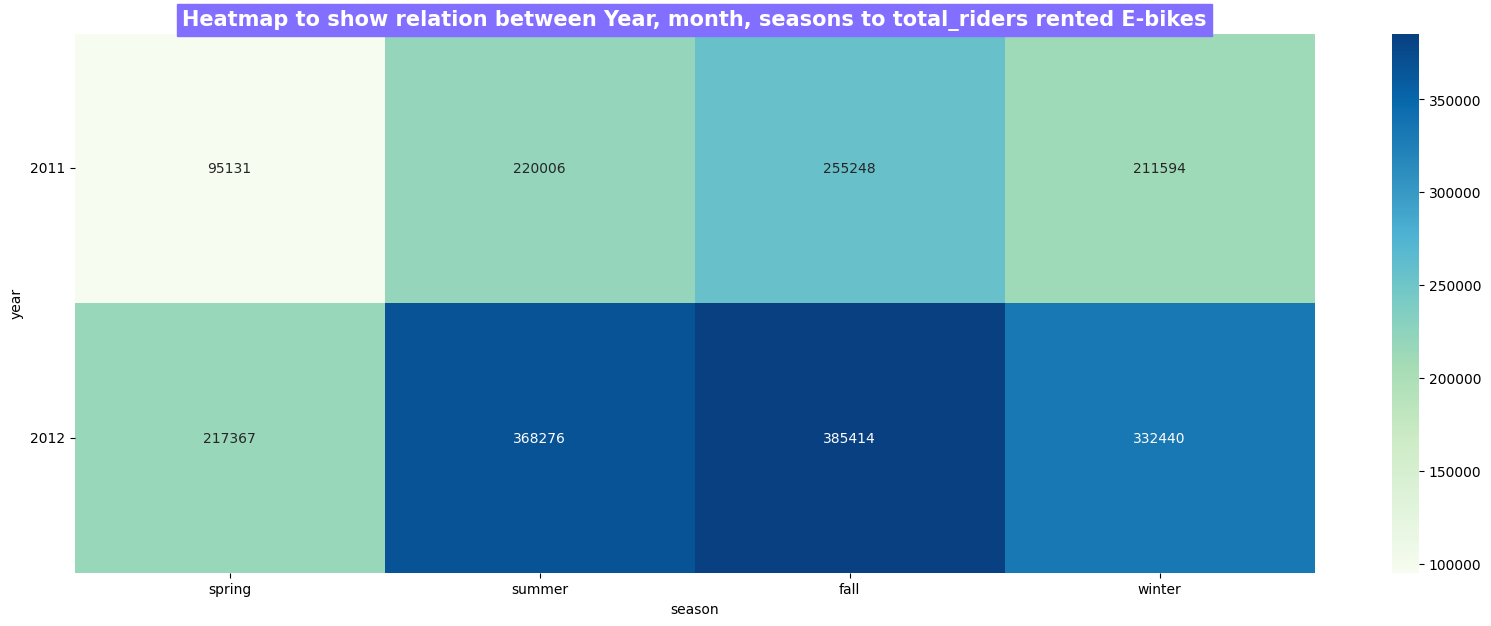

In [73]:
yms=bike_data.groupby(['year','season'])['total_riders'].sum()
data= yms.unstack(level=[1])
data.replace(np.nan,0, inplace=True)
display(data)
plt.figure(figsize=(20,7))
sns.heatmap(data, annot=True, fmt='.6g',cmap='GnBu')
plt.title('Heatmap to show relation between Year, month, seasons to total_riders rented E-bikes',
          fontsize=15,fontweight="bold",backgroundcolor='#836FFF',color='w')
plt.yticks(rotation=0)
plt.show()

### **Insights:**

> **[From both the Krukal-walis test & ANOVA test , we can confirm that The mean number of E-bikes rented differs across various Seasons.]()**

###**Recommendations**

Based on the confirmation that the mean number of E-bikes rented differs across various seasons, the following recommendations can be made:

1. Seasonal Pricing: Consider implementing seasonal pricing strategies to capitalize on the variations in demand for E-bikes. Offer promotions, discounts, or special packages during peak seasons to attract more customers and increase rentals.

2. Seasonal Marketing Campaigns: Tailor marketing campaigns to highlight the benefits of renting E-bikes during specific seasons. Emphasize factors such as weather conditions, events, or attractions that make E-bike rentals appealing during different times of the year.

3. Inventory Management: Adjust inventory levels based on seasonal demand patterns to ensure an adequate supply of E-bikes during peak seasons. Monitor rental trends and customer preferences to optimize the allocation of resources.

4. Seasonal Maintenance and Upgrades: Prioritize maintenance and upgrades for E-bikes before peak seasons to ensure the fleet is in top condition and meets customer expectations. Consider introducing new features or services to attract customers during specific seasons.

5. Customer Engagement: Use customer feedback and data analytics to understand preferences and behaviors during different seasons. Engage with customers through surveys, loyalty programs, or personalized recommendations to build stronger relationships and increase retention rates.

By tailoring strategies and operations to accommodate the variations in demand across different seasons, Yulu can optimize rental revenues, enhance customer satisfaction, and maintain a competitive edge in the market.

## **Weather conditions are significantly same or different during different Seasons?**

**STEP-1 :** Set up Null Hypothesis

* Null Hypothesis ( Ho ) - weather is independent of season

* Alternate Hypothesis ( Ha ) -weather is dependent of seasons.

\

---


**STEP-2:** Checking for basic assumptions for the hypothesis (Non-Parametric Test)

The data in the cells should be frequencies, or counts of cases.
The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
There are 2 variables, and both are measured as categories.
The value of the cell expecteds should be 5 or morein at least 80% of the cells, and no cell should have an expected of less than one (3).

\

---

**STEP-3:** Define Test statistics; Distribution of T under H0.

The test statistic for a Chi- square test . Under Ho, the test statistic should follow Chi-Square Distribution.

\

---

**STEP-4:** Decide the kind of test.

Here we will perform the chisquare Test of independence (i.e) chi2_contingency

\

---

**STEP-5:** Compute the p-value and fix value of alpha.

we will be computing the chi square-test p-value using the chi 2 function using scipy.stats. We set our alpha to be 0.05

\

---

**STEP-6:** Compare p-value and alpha.

Based on p-value, we will accept or reject H0.

    p-val > alpha : Accept H0
    p-val < alpha : Reject H0

\

The Chi-square statistic is a non-parametric (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups or homoscedasticity in the data.

\


In [74]:
ws = pd.crosstab(bike_data['weather'],bike_data['season'])
ws

season,spring,summer,fall,winter
weather,,,,
Clear,1759,1801,1930,1702
Misty_cloudy,715,708,604,807
Rain,211,224,199,225
Heavy_rain,1,0,0,0


In [75]:
chi_stat , p_value , dof , expected = chi2_contingency(ws)

print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected : ",expected)

alpha = 0.05
if p_value< alpha:
    print("Reject Ho")
    print("Weather is dependent on season")
else:
    print("Fail to Reject Ho")
    print("Weather is independent on season")

chi_stat :  49.15865559689363
p_value :  1.5499250736864862e-07
dof :  9
expected :  [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
Reject Ho
Weather is dependent on season


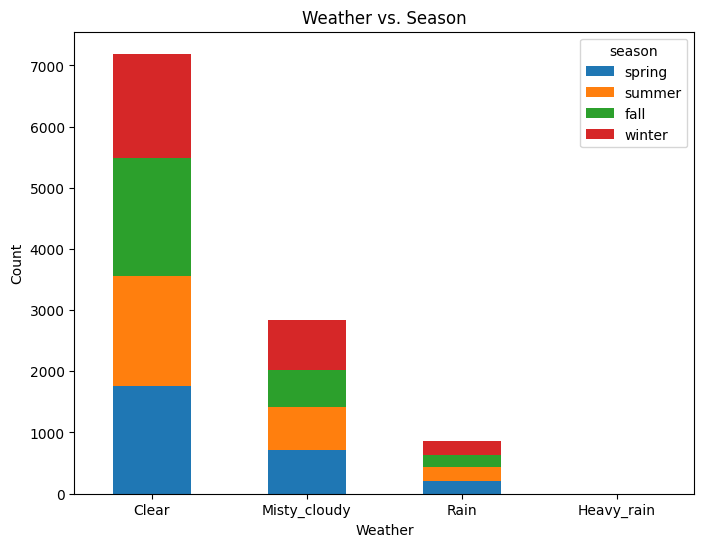

In [76]:
## Create a contingency table
contingency_table = pd.crosstab(bike_data['weather'], bike_data['season'])
# Plot a stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Weather vs. Season")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

#### **Insights:**

> [This chisquare test of independence confirms that Weather is dependent on Various seasons.]()

> [The results of the chi-square test of independence are as follows:]()

  * Chi-square statistic (chi2): 49.16

  * P-value (p): 1.55e-07 (very close to 0)

> [These results indicate the following:]()

  * There is a significant association between weather and season.
  * The p-value is extremely low (close to 0), suggesting that the two variables are not independent of each other.

From the visualization, it’s evident that there is a significant relationship between weather and season. Specifically, Spring and Summer tend to have more favorable weather conditions, while Fall and Winter experience less favorable conditions. This supports the alternative hypothesis (Ha) that weather and season are dependent.

* [The data is given from Timestamp(‘2011-01-01 00:00:00’) to Timestamp(‘2012-12-19 23:00:00’). The total time period for which the data is given is ‘718 days 23:00:00’.]()

\

* [Out of every 100 users, around 19 are casual users and 81 are registered users.]()

\

* [The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.]()

\

* [There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.]()

\

* [The average hourly count of rental bikes is the lowest in the month of January followed by February and March.]()

\

* [There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and night-time.]()

\

* [More than 80 % of the time, the temperature is less than 28 degrees celcius.]()

\

* [More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.]()

\

* [More than 85 % of the total, windspeed data has a value of less than 20.]()

\

* [The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.]()

\

* [The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.]()

\

* [There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.]()

\

* [The hourly total number of rental bikes is statistically different for different weathers.]()

\

* [There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.]()

\

* [The hourly total number of rental bikes is statistically different for different seasons.]()

\

#### **Recommendations:**

* [**Seasonal Marketing:**]()

    Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

\

* [**Time-based Pricing:**]()

    Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

\

* [**Weather-based Promotions:**]()

    Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

\

* [**User Segmentation:** ]()

    Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

\

* [**Optimize Inventory:**]()

    Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

\

* [**Improve Weather Data Collection:**]()

    Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions
    or implementing safety measures during extreme weather.

\

* [**Customer Comfort:**]()

    Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

\

* [**Collaborations with Weather Services:**]()

    Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

\

* [**Seasonal Bike Maintenance:**]()

    Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

\

* [**Customer Feedback and Reviews:** ]()

    Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

\

* [**Social Media Marketing:**]()

    Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments
    and drive more bookings.

\

* [**Special Occasion Discounts:** ]()

    Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.

\




---



---

